I was not able to create a function that predict every stocks in one ipynb so i had done one by one this is THYAO example that shows how my work done. Then manuelly pasted to my submission generator. To show what kind of path that i had while making the project i put some examples that lead me to have bad predictions and i added to this ipynb

Note: While exporting as html some of the figures did not exported for some reason i could not figure it out. So i addded ipynb file and i also added some of them to project report 

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import glob
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
import plotly as py
import plotly.graph_objects as go
import plotly.subplots as make_subplots

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [264]:
Data = pd.read_csv('/Users/egeerdil/Desktop/finalresults/THYAO_Data.csv')
Data2 = pd.read_csv('/Users/egeerdil/Desktop/finalresults/USD_TRY Historical Data.csv')


While analyzing the data hourly data prices were not enogh to observe so firstly i have been using the daily prices for teaching the model

In [265]:
Data2

Data2.rename(columns={'Date': 'Datetime'}, inplace=True)
Data2=Data2.iloc[::-1]
Data2

Datetime    Price     Open     High      Low  Vol. Change %
5704  03/01/2005   1.2815   1.2810   1.2885   1.2770   NaN   -0.12%
5703  03/02/2005   1.2825   1.2815   1.2890   1.2775   NaN    0.08%
5702  03/03/2005   1.2820   1.2830   1.2850   1.2685   NaN   -0.04%
5701  03/04/2005   1.2570   1.2800   1.2820   1.2550   NaN   -1.95%
5700  03/07/2005   1.2600   1.2570   1.2655   1.2545   NaN    0.24%
...          ...      ...      ...      ...      ...   ...      ...
4     01/10/2024  29.8575  29.9669  29.9783  29.8393   NaN   -0.36%
3     01/11/2024  30.0669  29.8650  30.4055  29.8266   NaN    0.70%
2     01/12/2024  30.1012  30.0672  30.2019  29.9600   NaN    0.11%
1     01/14/2024  30.0855  30.0795  30.1036  30.0641   NaN   -0.05%
0     01/15/2024  30.0571  30.0865  30.1122  29.9130   NaN   -0.09%

[5705 rows x 7 columns]

In [266]:
Data2.drop('High', axis='columns', inplace=True)
Data2.drop('Low', axis='columns', inplace=True)
Data2.drop('Price', axis='columns', inplace=True)
Data2.drop('Change %', axis='columns', inplace=True)
Data2.drop('Vol.', axis='columns', inplace=True)
Data2

Datetime     Open
5704  03/01/2005   1.2810
5703  03/02/2005   1.2815
5702  03/03/2005   1.2830
5701  03/04/2005   1.2800
5700  03/07/2005   1.2570
...          ...      ...
4     01/10/2024  29.9669
3     01/11/2024  29.8650
2     01/12/2024  30.0672
1     01/14/2024  30.0795
0     01/15/2024  30.0865

[5705 rows x 2 columns]

I have used the dollar prices while teaching to the algortihm 

In [267]:


Data.rename(columns={'Date': 'Datetime'}, inplace=True)
Data=Data.iloc[::-1]
Data

Datetime     Price      Open      High       Low    Vol. Change %
4778  01/03/2005    0.9180    0.9350    0.9350    0.9120   5.67M   -1.18%
4777  01/04/2005    0.9000    0.9120    0.9350    0.9000   9.91M   -1.96%
4776  01/05/2005    0.8590    0.8940    0.8940    0.8590  14.16M   -4.56%
4775  01/06/2005    0.8710    0.8590    0.8770    0.8590   6.36M    1.40%
4774  01/07/2005    0.8710    0.8710    0.8770    0.8590  19.87M    0.00%
...          ...       ...       ...       ...       ...     ...      ...
4     01/10/2024  249.9000  242.9000  252.2500  242.2000  46.35M    2.88%
3     01/11/2024   30.0669   29.8650   30.4055   29.8266     NaN    0.70%
2     01/12/2024   30.1012   30.0672   30.2019   29.9600     NaN    0.11%
1     01/14/2024   30.0855   30.0795   30.1036   30.0641     NaN   -0.05%
0     01/15/2024   30.0571   30.0865   30.1122   29.9130     NaN   -0.09%

[4779 rows x 7 columns]

In [268]:
merged_df = pd.merge(Data2, Data, on='Datetime')

In [269]:
kf = merged_df


In [270]:
kf

Datetime   Open_x     Price    Open_y      High       Low    Vol.  \
0     03/01/2005   1.2810    0.8480    0.8770    0.8770    0.8480  13.22M   
1     03/02/2005   1.2815    0.8420    0.8480    0.8590    0.8360   6.26M   
2     03/03/2005   1.2830    0.8480    0.8420    0.8530    0.8360   5.01M   
3     03/04/2005   1.2800    0.8420    0.8480    0.8590    0.8360   5.77M   
4     03/07/2005   1.2570    0.8420    0.8480    0.8530    0.8300  17.59M   
...          ...      ...       ...       ...       ...       ...     ...   
5390  01/10/2024  29.9669  249.9000  242.9000  252.2500  242.2000  46.35M   
5391  01/11/2024  29.8650   30.0669   29.8650   30.4055   29.8266     NaN   
5392  01/12/2024  30.0672   30.1012   30.0672   30.2019   29.9600     NaN   
5393  01/14/2024  30.0795   30.0855   30.0795   30.1036   30.0641     NaN   
5394  01/15/2024  30.0865   30.0571   30.0865   30.1122   29.9130     NaN   

     Change %  
0      -3.31%  
1      -0.71%  
2       0.71%  
3      -0.71%  
4       0.00%  
...       ...  
5390    2.88%  
5391    0.70%  
5392    0.11%  
5393   -0.05%  
5394   -0.09%  

[5395 rows x 8 columns]

Open_x is the name of the dollar values

In [271]:
#ı had merged the prices ınto the dataset
merged_df

Datetime   Open_x     Price    Open_y      High       Low    Vol.  \
0     03/01/2005   1.2810    0.8480    0.8770    0.8770    0.8480  13.22M   
1     03/02/2005   1.2815    0.8420    0.8480    0.8590    0.8360   6.26M   
2     03/03/2005   1.2830    0.8480    0.8420    0.8530    0.8360   5.01M   
3     03/04/2005   1.2800    0.8420    0.8480    0.8590    0.8360   5.77M   
4     03/07/2005   1.2570    0.8420    0.8480    0.8530    0.8300  17.59M   
...          ...      ...       ...       ...       ...       ...     ...   
5390  01/10/2024  29.9669  249.9000  242.9000  252.2500  242.2000  46.35M   
5391  01/11/2024  29.8650   30.0669   29.8650   30.4055   29.8266     NaN   
5392  01/12/2024  30.0672   30.1012   30.0672   30.2019   29.9600     NaN   
5393  01/14/2024  30.0795   30.0855   30.0795   30.1036   30.0641     NaN   
5394  01/15/2024  30.0865   30.0571   30.0865   30.1122   29.9130     NaN   

     Change %  
0      -3.31%  
1      -0.71%  
2       0.71%  
3      -0.71%  
4       0.00%  
...       ...  
5390    2.88%  
5391    0.70%  
5392    0.11%  
5393   -0.05%  
5394   -0.09%  

[5395 rows x 8 columns]

In [272]:
merged_df.rename(columns={'Open_y': 'Open'}, inplace=True)


In [273]:
split_index = len(merged_df) // 2

# Take the last half of instances from all columns
merged_df  =  merged_df.iloc[split_index:]

In [274]:
merged_df

Datetime   Open_x     Price      Open      High       Low    Vol.  \
2697  11/26/2015   2.8886    7.7300    7.9300    8.0000    7.7100  52.86M   
2698  11/27/2015   2.9218    7.8300    7.7300    7.9100    7.7200  59.09M   
2699  11/30/2015   2.9211    7.6600    7.8800    7.9100    7.6500  45.68M   
2700  12/01/2015   2.9136    7.9300    7.6900    7.9600    7.6900  68.41M   
2701  12/02/2015   2.8907    7.9000    7.9800    8.0700    7.8800  88.15M   
...          ...      ...       ...       ...       ...       ...     ...   
5390  01/10/2024  29.9669  249.9000  242.9000  252.2500  242.2000  46.35M   
5391  01/11/2024  29.8650   30.0669   29.8650   30.4055   29.8266     NaN   
5392  01/12/2024  30.0672   30.1012   30.0672   30.2019   29.9600     NaN   
5393  01/14/2024  30.0795   30.0855   30.0795   30.1036   30.0641     NaN   
5394  01/15/2024  30.0865   30.0571   30.0865   30.1122   29.9130     NaN   

     Change %  
2697   -2.77%  
2698    1.29%  
2699   -2.17%  
2700    3.52%  
2701   -0.38%  
...       ...  
5390    2.88%  
5391    0.70%  
5392    0.11%  
5393   -0.05%  
5394   -0.09%  

[2698 rows x 8 columns]

In [275]:
dt= merged_df 

In [276]:
dt= dt[['Datetime','Open']].copy()
dt = dt.set_index('Datetime')


In [277]:
dt

Open
Datetime            
11/26/2015    7.9300
11/27/2015    7.7300
11/30/2015    7.8800
12/01/2015    7.6900
12/02/2015    7.9800
...              ...
01/10/2024  242.9000
01/11/2024   29.8650
01/12/2024   30.0672
01/14/2024   30.0795
01/15/2024   30.0865

[2698 rows x 1 columns]

In [278]:

decomp = STL(dt,period = 365).fit()

I have analyzed the data by its trend seosanilty and residual values

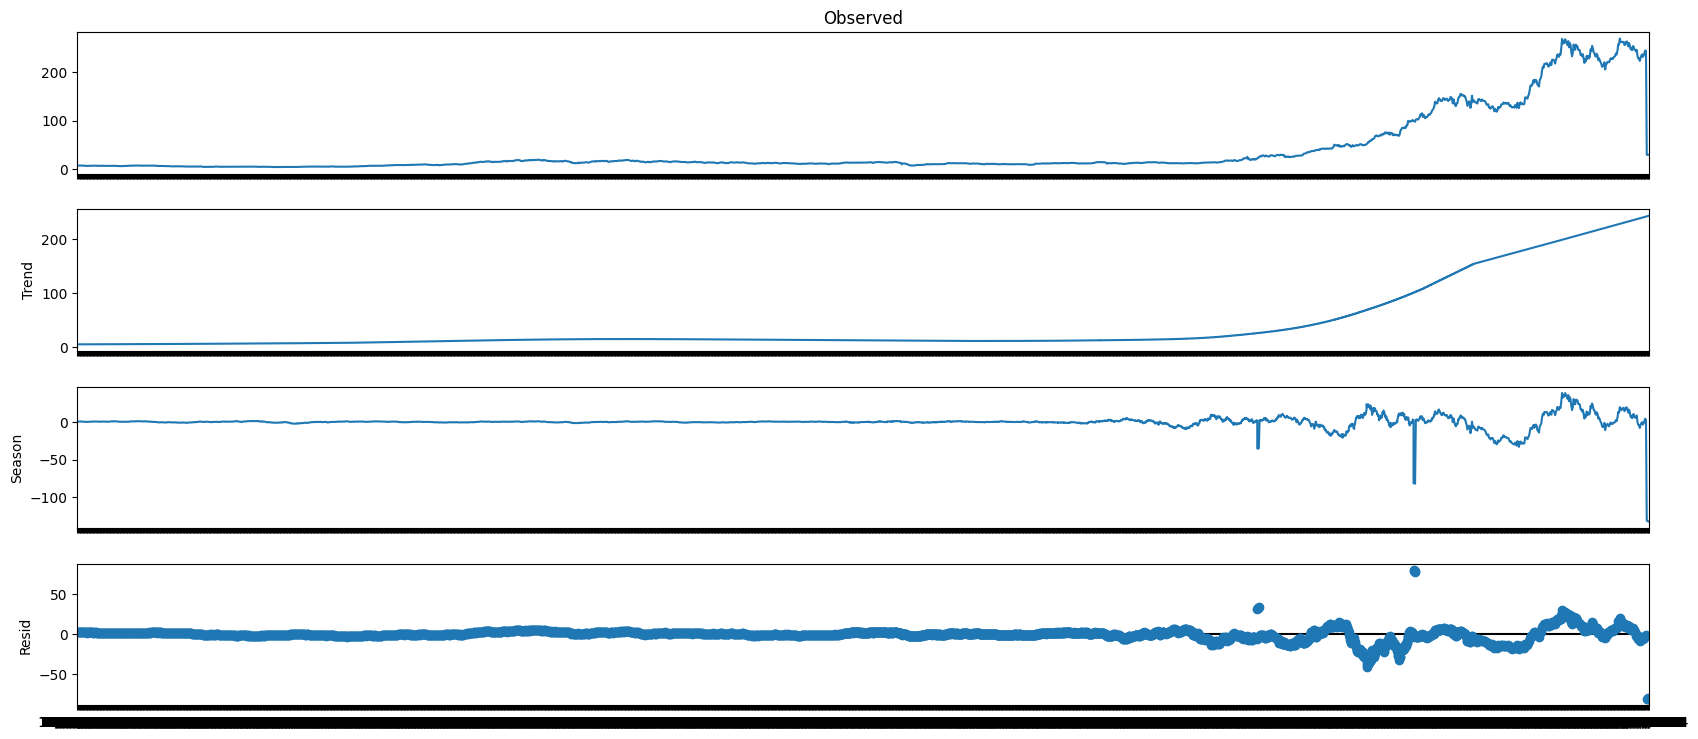

In [279]:
decomp
fig = decomp.plot()
fig.set_size_inches(20,8)

In [280]:
merged_df['EMA_9'] = merged_df['Open'].ewm(9).mean().shift()
merged_df['SMA_5'] = merged_df['Open'].rolling(5).mean().shift()
merged_df['SMA_10'] = merged_df['Open'].rolling(10).mean().shift()
merged_df['SMA_15'] = merged_df['Open'].rolling(15).mean().shift()
merged_df['SMA_30'] = merged_df['Open'].rolling(30).mean().shift()
df = merged_df

/var/folders/03/z4wskh452mv6d1j22j0z9jnh0000gn/T/ipykernel_38714/3838016919.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/03/z4wskh452mv6d1j22j0z9jnh0000gn/T/ipykernel_38714/3838016919.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/03/z4wskh452mv6d1j22j0z9jnh0000gn/T/ipykernel_38714/3838016919.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

the meaning of these indicators have been explained in the report

In [281]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Datetime, y=df.EMA_9, name=' EMA 9'))
fig.add_trace(go.Scatter(x=df.Datetime, y=df.SMA_5, name= 'SMA 5'))
fig.add_trace(go.Scatter(x=df.Datetime, y=df.SMA_10, name=' SMA 10'))
fig.add_trace(go.Scatter(x=df.Datetime, y=df.SMA_15, name=' SMA 15'))
fig.add_trace(go.Scatter(x=df.Datetime, y=df.SMA_30, name=' SMA 30'))
fig.add_trace(go.Scatter(x=df.Datetime, y=df.Open, name='Open', opacity=0.2))

In [282]:
def relative_strength_idx(df, n=14):
    open = df['Open']
    delta = open.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(window=n).mean()
    rollDown = pricesDown.abs().rolling(window=n).mean()
    rs = rollUp/rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi
df['RSI'] = relative_strength_idx(df).fillna(0)
fig
fig.show()
go.Figure(go.Scatter(x=df.Datetime, y=df.RSI, name='RSI'))

/var/folders/03/z4wskh452mv6d1j22j0z9jnh0000gn/T/ipykernel_38714/1319484936.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [283]:
EMA_12 = pd.Series(df['Open'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['Open'].ewm(span=26, min_periods=26).mean())
df['MACD'] = pd.Series(EMA_12 - EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())
EMA_12
df['MACD']
df['MACD_signal']


/var/folders/03/z4wskh452mv6d1j22j0z9jnh0000gn/T/ipykernel_38714/725627624.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/03/z4wskh452mv6d1j22j0z9jnh0000gn/T/ipykernel_38714/725627624.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2697          NaN
2698          NaN
2699          NaN
2700          NaN
2701          NaN
          ...    
5390    -3.161835
5391    -6.248901
5392   -11.247168
5393   -17.155491
5394   -23.285281
Name: MACD_signal, Length: 2698, dtype: float64

In [284]:
#fig = make_subplots(rows=2,cols=1)
#fig.add_trace(go.Scatter(x=df.Datetime, y=df.Open, name='Open'), row=1, col=1)
#fig.add_trace(go.Scatter(x=df.Datetime, y=EMA_12, name='EMA 12'), row=1, col=1)
#fig.add_trace(go.Scatter(x=df.Datetime, y=EMA_26, name='EMA 26'), row=1, col=1)
#fig.add_trace(go.Scatter(x=df.Datetime, y=df['MACD'], name= 'MACD'), row=2, col=1)
#fig.add_trace(go.Scatter(x=df.Datetime, y=df['MACD_signal'], name='Signal line'),row=2, col=1)
#fig.show()


In [285]:
df['Open'] = df['Open'].shift(-1)
df

/var/folders/03/z4wskh452mv6d1j22j0z9jnh0000gn/T/ipykernel_38714/3792536601.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Datetime   Open_x     Price     Open      High       Low    Vol.  \
2697  11/26/2015   2.8886    7.7300   7.7300    8.0000    7.7100  52.86M   
2698  11/27/2015   2.9218    7.8300   7.8800    7.9100    7.7200  59.09M   
2699  11/30/2015   2.9211    7.6600   7.6900    7.9100    7.6500  45.68M   
2700  12/01/2015   2.9136    7.9300   7.9800    7.9600    7.6900  68.41M   
2701  12/02/2015   2.8907    7.9000   7.9400    8.0700    7.8800  88.15M   
...          ...      ...       ...      ...       ...       ...     ...   
5390  01/10/2024  29.9669  249.9000  29.8650  252.2500  242.2000  46.35M   
5391  01/11/2024  29.8650   30.0669  30.0672   30.4055   29.8266     NaN   
5392  01/12/2024  30.0672   30.1012  30.0795   30.2019   29.9600     NaN   
5393  01/14/2024  30.0795   30.0855  30.0865   30.1036   30.0641     NaN   
5394  01/15/2024  30.0865   30.0571      NaN   30.1122   29.9130     NaN   

     Change %       EMA_9      SMA_5     SMA_10      SMA_15      SMA_30  \
2697   -2.77%         NaN        NaN        NaN         NaN         NaN   
2698    1.29%    7.930000        NaN        NaN         NaN         NaN   
2699   -2.17%    7.824737        NaN        NaN         NaN         NaN   
2700    3.52%    7.845129        NaN        NaN         NaN         NaN   
2701   -0.38%    7.800020        NaN        NaN         NaN         NaN   
...       ...         ...        ...        ...         ...         ...   
5390    2.88%  238.575826  236.68000  232.34000  235.560000  245.285000   
5391    0.70%  239.008244  238.08000  233.89000  235.373333  244.665000   
5392    0.11%  218.093919  197.91300  214.11650  221.031000  236.943833   
5393   -0.05%  199.291247  157.16644  194.87322  206.908813  229.446073   
5394   -0.09%  182.370073  115.36234  174.98117  192.580780  221.932057   

            RSI       MACD  MACD_signal  
2697        NaN        NaN          NaN  
2698   0.000000        NaN          NaN  
2699   0.000000        NaN          NaN  
2700   0.000000        NaN          NaN  
2701   0.000000        NaN          NaN  
...         ...        ...          ...  
5390  48.303716  -2.168921    -3.161835  
5391  10.999319 -18.597167    -6.248901  
5392  10.040337 -31.240236   -11.247168  
5393  10.538152 -40.788780   -17.155491  
5394  10.750269 -47.804444   -23.285281  

[2698 rows x 16 columns]

In [286]:
df = df.iloc[33:]
df = df[:-1]
df.index =range(len(df))

In [287]:
df = df[:-1]
df

Datetime   Open_x     Price      Open      High       Low    Vol.  \
0     01/13/2016   3.0345    7.3400    7.3300    7.4000    7.3000  71.44M   
1     01/14/2016   3.0265    7.2000    7.2100    7.3700    7.1600  84.58M   
2     01/15/2016   3.0229    7.1000    7.1500    7.2700    7.0700  81.85M   
3     01/18/2016   3.0489    7.1600    7.2300    7.2100    7.0700  52.79M   
4     01/19/2016   3.0342    7.2300    7.1800    7.2900    7.2000  49.27M   
...          ...      ...       ...       ...       ...       ...     ...   
2658  01/08/2024  29.8702  242.6000  243.9000  244.1000  237.7000  26.27M   
2659  01/09/2024  29.9220  242.9000  242.9000  250.5000  239.4000  46.26M   
2660  01/10/2024  29.9669  249.9000   29.8650  252.2500  242.2000  46.35M   
2661  01/11/2024  29.8650   30.0669   30.0672   30.4055   29.8266     NaN   
2662  01/12/2024  30.0672   30.1012   30.0795   30.2019   29.9600     NaN   

     Change %       EMA_9    SMA_5    SMA_10      SMA_15      SMA_30  \
0       0.96%    7.331593    7.238    7.3080    7.358667    7.411667   
1      -1.91%    7.330400    7.264    7.2850    7.348667    7.399333   
2      -1.39%    7.330359    7.296    7.2680    7.339333    7.377667   
3       0.85%    7.318046    7.268    7.2490    7.320000    7.353333   
4       0.98%    7.300894    7.260    7.2410    7.301333    7.334000   
...       ...         ...      ...       ...         ...         ...   
2658    1.42%  237.860279  232.580  231.7800  236.993333  246.576667   
2659    0.12%  237.984251  234.600  231.1900  236.083333  245.846667   
2660    2.88%  238.575826  236.680  232.3400  235.560000  245.285000   
2661    0.70%  239.008244  238.080  233.8900  235.373333  244.665000   
2662    0.11%  218.093919  197.913  214.1165  221.031000  236.943833   

            RSI       MACD  MACD_signal  
0     42.990654  -0.047443    -0.048787  
1     41.904762  -0.041698    -0.047199  
2     40.000000  -0.045749    -0.046882  
3     37.931034  -0.052923    -0.048179  
4     35.714286  -0.051861    -0.048958  
...         ...        ...          ...  
2658  39.936356  -3.801820    -3.547631  
2659  48.538961  -2.859794    -3.410063  
2660  48.303716  -2.168921    -3.161835  
2661  10.999319 -18.597167    -6.248901  
2662  10.040337 -31.240236   -11.247168  

[2663 rows x 16 columns]

In [288]:
test_size = 0.15
valid_size = 0.15
test_split_idx = int(df.shape[0] * (1-test_size))
valid_split_idx = int(df.shape[0] * (1-(valid_size+test_size)))
train_df = df.loc[:valid_split_idx]
valid_df= df.loc[valid_split_idx+1:test_split_idx]
test_df= df.loc[test_split_idx+1:]


fig = go. Figure()
fig.add_trace(go.Scatter(x=train_df.Datetime, y=train_df.Open, name='Training'))
fig.add_trace(go.Scatter(x=valid_df.Datetime, y=valid_df.Open, name='Validation'))
fig.add_trace(go.Scatter(x=test_df.Datetime, y=test_df.Open,name= 'Test'))

I have firstly tried to split my dataset into this type of algoritm however it did not work because it was not random so changed afterwards

In [289]:
train_df

Datetime   Open_x  Price   Open   High    Low     Vol. Change %  \
0     01/13/2016   3.0345   7.34   7.33   7.40   7.30   71.44M    0.96%   
1     01/14/2016   3.0265   7.20   7.21   7.37   7.16   84.58M   -1.91%   
2     01/15/2016   3.0229   7.10   7.15   7.27   7.07   81.85M   -1.39%   
3     01/18/2016   3.0489   7.16   7.23   7.21   7.07   52.79M    0.85%   
4     01/19/2016   3.0342   7.23   7.18   7.29   7.20   49.27M    0.98%   
...          ...      ...    ...    ...    ...    ...      ...      ...   
1860  11/11/2021   9.8421  17.72  18.10  18.30  17.71  108.71M   -2.26%   
1861  11/11/2021   9.8899  17.72  17.82  18.30  17.71  108.71M   -2.26%   
1862  11/12/2021   9.8967  17.82  17.83  18.04  17.63   82.57M    0.56%   
1863  11/15/2021   9.9945  17.61  17.83  18.30  17.47  202.41M   -1.18%   
1864  11/15/2021  10.0508  17.61  17.63  18.30  17.47  202.41M   -1.18%   

          EMA_9   SMA_5  SMA_10     SMA_15     SMA_30        RSI      MACD  \
0      7.331593   7.238   7.308   7.358667   7.411667  42.990654 -0.047443   
1      7.330400   7.264   7.285   7.348667   7.399333  41.904762 -0.041698   
2      7.330359   7.296   7.268   7.339333   7.377667  40.000000 -0.045749   
3      7.318046   7.268   7.249   7.320000   7.353333  37.931034 -0.052923   
4      7.300894   7.260   7.241   7.301333   7.334000  35.714286 -0.051861   
...         ...     ...     ...        ...        ...        ...       ...   
1860  16.554240  18.070  17.271  16.583333  15.472000  97.272727  1.012054   
1861  16.708816  18.128  17.537  16.791333  15.589000  96.959459  1.001592   
1862  16.847934  18.132  17.734  16.999333  15.706000  88.580247  0.959645   
1863  16.945141  18.080  17.903  17.166000  15.822000  88.178914  0.916642   
1864  17.033627  18.008  18.001  17.333333  15.938333  88.178914  0.872505   

      MACD_signal  
0       -0.048787  
1       -0.047199  
2       -0.046882  
3       -0.048179  
4       -0.048958  
...           ...  
1860     0.821138  
1861     0.857229  
1862     0.877712  
1863     0.885498  
1864     0.882899  

[1865 rows x 16 columns]

In [290]:
drop_cols = ['Datetime','Open_x','Price','High','Low','Vol.',  'Change %']
train_df = train_df.drop(drop_cols, axis=1)
valid_df = valid_df.drop(drop_cols,axis= 1)
test_df = test_df.drop(drop_cols,axis= 1)

In [291]:
y_train = train_df['Open'].copy()
X_train = train_df.drop(['Open'],axis=1)

y_valid = valid_df['Open'].copy()
X_valid = valid_df.drop(['Open'],axis=1)

y_test= test_df['Open'].copy()
X_test = test_df.drop(['Open'], axis=1)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EMA_9        1865 non-null   float64
 1   SMA_5        1865 non-null   float64
 2   SMA_10       1865 non-null   float64
 3   SMA_15       1865 non-null   float64
 4   SMA_30       1865 non-null   float64
 5   RSI          1865 non-null   float64
 6   MACD         1865 non-null   float64
 7   MACD_signal  1865 non-null   float64
dtypes: float64(8)
memory usage: 116.7 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1865 entries, 0 to 1864
Series name: Open
Non-Null Count  Dtype  
--------------  -----  
1865 non-null   float64
dtypes: float64(1)
memory usage: 14.7 KB


In [292]:
from sklearn.model_selection import train_test_split


df_for_prediction = df
df_for_prediction

Datetime   Open_x     Price      Open      High       Low    Vol.  \
0     01/13/2016   3.0345    7.3400    7.3300    7.4000    7.3000  71.44M   
1     01/14/2016   3.0265    7.2000    7.2100    7.3700    7.1600  84.58M   
2     01/15/2016   3.0229    7.1000    7.1500    7.2700    7.0700  81.85M   
3     01/18/2016   3.0489    7.1600    7.2300    7.2100    7.0700  52.79M   
4     01/19/2016   3.0342    7.2300    7.1800    7.2900    7.2000  49.27M   
...          ...      ...       ...       ...       ...       ...     ...   
2658  01/08/2024  29.8702  242.6000  243.9000  244.1000  237.7000  26.27M   
2659  01/09/2024  29.9220  242.9000  242.9000  250.5000  239.4000  46.26M   
2660  01/10/2024  29.9669  249.9000   29.8650  252.2500  242.2000  46.35M   
2661  01/11/2024  29.8650   30.0669   30.0672   30.4055   29.8266     NaN   
2662  01/12/2024  30.0672   30.1012   30.0795   30.2019   29.9600     NaN   

     Change %       EMA_9    SMA_5    SMA_10      SMA_15      SMA_30  \
0       0.96%    7.331593    7.238    7.3080    7.358667    7.411667   
1      -1.91%    7.330400    7.264    7.2850    7.348667    7.399333   
2      -1.39%    7.330359    7.296    7.2680    7.339333    7.377667   
3       0.85%    7.318046    7.268    7.2490    7.320000    7.353333   
4       0.98%    7.300894    7.260    7.2410    7.301333    7.334000   
...       ...         ...      ...       ...         ...         ...   
2658    1.42%  237.860279  232.580  231.7800  236.993333  246.576667   
2659    0.12%  237.984251  234.600  231.1900  236.083333  245.846667   
2660    2.88%  238.575826  236.680  232.3400  235.560000  245.285000   
2661    0.70%  239.008244  238.080  233.8900  235.373333  244.665000   
2662    0.11%  218.093919  197.913  214.1165  221.031000  236.943833   

            RSI       MACD  MACD_signal  
0     42.990654  -0.047443    -0.048787  
1     41.904762  -0.041698    -0.047199  
2     40.000000  -0.045749    -0.046882  
3     37.931034  -0.052923    -0.048179  
4     35.714286  -0.051861    -0.048958  
...         ...        ...          ...  
2658  39.936356  -3.801820    -3.547631  
2659  48.538961  -2.859794    -3.410063  
2660  48.303716  -2.168921    -3.161835  
2661  10.999319 -18.597167    -6.248901  
2662  10.040337 -31.240236   -11.247168  

[2663 rows x 16 columns]

In [293]:
df_for_prediction['Vol.'] = df_for_prediction['Vol.'].str[:-1]

df_for_prediction['Vol.'] = df_for_prediction['Vol.'].astype(float)


Volume was an object ı have changed ıt ınto volume

In [294]:
train, test = train_test_split(df, test_size=0.2, random_state=0)

the better train test values are calculated

In [295]:
train_X = train.drop('Open', axis= 1)
train_y = train[['Open']]

test_X = test.drop('Open', axis= 1)
test_y = test[['Open']]

In [296]:
test_y

Open
896   12.44
2266  81.60
1142   9.09
501   16.29
2279  90.40
...     ...
2219  69.40
953   11.66
855   13.04
162    5.20
670   18.04

[533 rows x 1 columns]

In [297]:
X_train = train_X

In [298]:
X_train

Datetime   Open_x   Price    High     Low    Vol. Change %  \
2247  09/20/2022  18.2964   72.45   72.45   68.00   68.40    5.38%   
1499  01/20/2021   7.4139   13.26   13.52   13.20   66.00   -1.27%   
2056  04/13/2022  14.6031   36.98   37.54   36.28  114.09   -0.70%   
1489  01/13/2021   7.4611   13.28   13.28   12.97  215.98    3.27%   
1294  08/12/2020   7.2054   11.42   12.06   11.42  204.32   -1.64%   
...          ...      ...     ...     ...     ...     ...      ...   
1731  08/02/2021   8.4609   12.87   12.99   12.70   45.62    1.10%   
763   01/23/2019   5.3397   14.69   14.77   14.38   94.16    2.01%   
835   05/07/2019   6.0780   13.52   13.70   13.35   44.74   -2.03%   
1653  05/25/2021   8.4512   12.90   13.55   12.90   71.90   -4.23%   
2607  10/26/2023  28.1531  214.20  215.40  203.30   51.30    5.52%   

           EMA_9    SMA_5   SMA_10      SMA_15      SMA_30        RSI  \
2247   73.173060   73.550   73.570   73.920000   73.103333  32.551320   
1499   13.101766   13.324   13.260   13.098000   12.947667  76.258993   
2056   33.792006   35.808   35.256   34.460000   31.797333  90.879479   
1489   12.747438   12.774   12.745   12.790000   12.690333  53.947368   
1294   10.933648   10.522   10.709   10.767333   11.302333  59.190031   
...          ...      ...      ...         ...         ...        ...   
1731   12.929913   12.628   12.621   12.789333   13.259000  36.153846   
763    15.079407   14.478   14.761   15.005333   15.435333  26.446281   
835    14.009912   14.074   14.057   14.079333   13.868000  42.319749   
1653   13.228984   13.516   13.459   13.383333   12.942333  65.000000   
2607  225.153513  214.460  220.110  225.386667  229.456667  26.832642   

          MACD  MACD_signal  
2247  0.477894     1.237372  
1499  0.199062     0.160767  
2056  1.943863     1.804950  
1489  0.066651     0.073187  
1294 -0.227606    -0.293320  
...        ...          ...  
1731 -0.302158    -0.328479  
763  -0.402936    -0.342072  
835   0.000256     0.063292  
1653  0.289818     0.308713  
2607 -6.968761    -5.015604  

[2130 rows x 15 columns]

In [299]:
y_train =train_y

In [300]:
y_test = test_y

In [301]:
X_test = test_X

In [302]:
drop_cols = ['Datetime','Price','High','Low',  'Change %']
X_train = X_train.drop(drop_cols, axis=1)


In [303]:
X_train.dtypes

Open_x         float64
Vol.           float64
EMA_9          float64
SMA_5          float64
SMA_10         float64
SMA_15         float64
SMA_30         float64
RSI            float64
MACD           float64
MACD_signal    float64
dtype: object

In [304]:
X_train

Open_x    Vol.       EMA_9    SMA_5   SMA_10      SMA_15      SMA_30  \
2247  18.2964   68.40   73.173060   73.550   73.570   73.920000   73.103333   
1499   7.4139   66.00   13.101766   13.324   13.260   13.098000   12.947667   
2056  14.6031  114.09   33.792006   35.808   35.256   34.460000   31.797333   
1489   7.4611  215.98   12.747438   12.774   12.745   12.790000   12.690333   
1294   7.2054  204.32   10.933648   10.522   10.709   10.767333   11.302333   
...       ...     ...         ...      ...      ...         ...         ...   
1731   8.4609   45.62   12.929913   12.628   12.621   12.789333   13.259000   
763    5.3397   94.16   15.079407   14.478   14.761   15.005333   15.435333   
835    6.0780   44.74   14.009912   14.074   14.057   14.079333   13.868000   
1653   8.4512   71.90   13.228984   13.516   13.459   13.383333   12.942333   
2607  28.1531   51.30  225.153513  214.460  220.110  225.386667  229.456667   

            RSI      MACD  MACD_signal  
2247  32.551320  0.477894     1.237372  
1499  76.258993  0.199062     0.160767  
2056  90.879479  1.943863     1.804950  
1489  53.947368  0.066651     0.073187  
1294  59.190031 -0.227606    -0.293320  
...         ...       ...          ...  
1731  36.153846 -0.302158    -0.328479  
763   26.446281 -0.402936    -0.342072  
835   42.319749  0.000256     0.063292  
1653  65.000000  0.289818     0.308713  
2607  26.832642 -6.968761    -5.015604  

[2130 rows x 10 columns]

In [305]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.9863390930373497
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [306]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=500,
                       objective='reg:squarederror',
                       max_depth=7,
                       learning_rate=0.07)
reg.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [307]:
X_train

Open_x    Vol.       EMA_9    SMA_5   SMA_10      SMA_15      SMA_30  \
2247  18.2964   68.40   73.173060   73.550   73.570   73.920000   73.103333   
1499   7.4139   66.00   13.101766   13.324   13.260   13.098000   12.947667   
2056  14.6031  114.09   33.792006   35.808   35.256   34.460000   31.797333   
1489   7.4611  215.98   12.747438   12.774   12.745   12.790000   12.690333   
1294   7.2054  204.32   10.933648   10.522   10.709   10.767333   11.302333   
...       ...     ...         ...      ...      ...         ...         ...   
1731   8.4609   45.62   12.929913   12.628   12.621   12.789333   13.259000   
763    5.3397   94.16   15.079407   14.478   14.761   15.005333   15.435333   
835    6.0780   44.74   14.009912   14.074   14.057   14.079333   13.868000   
1653   8.4512   71.90   13.228984   13.516   13.459   13.383333   12.942333   
2607  28.1531   51.30  225.153513  214.460  220.110  225.386667  229.456667   

            RSI      MACD  MACD_signal  
2247  32.551320  0.477894     1.237372  
1499  76.258993  0.199062     0.160767  
2056  90.879479  1.943863     1.804950  
1489  53.947368  0.066651     0.073187  
1294  59.190031 -0.227606    -0.293320  
...         ...       ...          ...  
1731  36.153846 -0.302158    -0.328479  
763   26.446281 -0.402936    -0.342072  
835   42.319749  0.000256     0.063292  
1653  65.000000  0.289818     0.308713  
2607  26.832642 -6.968761    -5.015604  

[2130 rows x 10 columns]

kf

In [308]:
kf

Datetime   Open_x     Price      Open      High       Low    Vol.  \
0     03/01/2005   1.2810    0.8480    0.8770    0.8770    0.8480  13.22M   
1     03/02/2005   1.2815    0.8420    0.8480    0.8590    0.8360   6.26M   
2     03/03/2005   1.2830    0.8480    0.8420    0.8530    0.8360   5.01M   
3     03/04/2005   1.2800    0.8420    0.8480    0.8590    0.8360   5.77M   
4     03/07/2005   1.2570    0.8420    0.8480    0.8530    0.8300  17.59M   
...          ...      ...       ...       ...       ...       ...     ...   
5390  01/10/2024  29.9669  249.9000  242.9000  252.2500  242.2000  46.35M   
5391  01/11/2024  29.8650   30.0669   29.8650   30.4055   29.8266     NaN   
5392  01/12/2024  30.0672   30.1012   30.0672   30.2019   29.9600     NaN   
5393  01/14/2024  30.0795   30.0855   30.0795   30.1036   30.0641     NaN   
5394  01/15/2024  30.0865   30.0571   30.0865   30.1122   29.9130     NaN   

     Change %  
0      -3.31%  
1      -0.71%  
2       0.71%  
3      -0.71%  
4       0.00%  
...       ...  
5390    2.88%  
5391    0.70%  
5392    0.11%  
5393   -0.05%  
5394   -0.09%  

[5395 rows x 8 columns]

In [309]:

drop_cols = ['Datetime','Price','High','Low',  'Change %']
X_test = X_test.drop(drop_cols, axis=1)

In [310]:
y_pred = reg.predict(X_test)


In [311]:
y_pred

array([ 12.381899 ,  81.35779  ,   9.11492  ,  16.15653  ,  90.973335 ,
        75.75291  ,  15.353381 ,  11.861117 ,  12.979156 ,  11.964158 ,
        59.164864 ,  49.538387 ,  88.79821  , 222.57799  ,  12.061224 ,
         6.1662884, 236.49771  ,  19.511663 ,  28.155678 ,  13.914628 ,
        11.388663 ,  12.563441 ,  17.697746 ,  15.983209 ,  17.1815   ,
       147.21712  , 144.22667  ,  47.39258  ,  12.091829 , 219.24158  ,
        13.894932 ,   5.2191215,  16.190739 ,  12.9599495,   4.898813 ,
         5.1127763,  11.841885 ,   5.5209713,  13.529852 ,  12.617823 ,
        11.825516 ,  12.69721  ,   5.1358824,   5.5444736,  15.791593 ,
         9.390954 , 148.50032  ,   7.5430894, 147.4592   ,  12.599994 ,
       237.21964  ,   5.5583906,  19.133568 ,  10.948992 ,   5.1395984,
        13.094669 ,  10.432223 ,  17.333565 ,  26.095238 ,   6.0386095,
       125.4283   ,  42.749184 , 106.86733  ,  10.4032755,  48.11194  ,
       152.1036   ,   8.924105 ,  14.614957 ,  12.365364 ,  10.6

In [312]:
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [[12.44]
 [81.6 ]
 [ 9.09]
 [16.29]
 [90.4 ]]
y_pred = [12.381899 81.35779   9.11492  16.15653  90.973335]


In [313]:
df2 = pd.DataFrame(y_pred).reset_index()

In [314]:
df1 = y_test.reset_index()

In [315]:
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)
merged_df

index_x   Open  index_y          0
0        896  12.44        0  12.381899
1       2266  81.60        1  81.357788
2       1142   9.09        2   9.114920
3        501  16.29        3  16.156530
4       2279  90.40        4  90.973335
..       ...    ...      ...        ...
528     2219  69.40      528  70.243149
529      953  11.66      529  11.801571
530      855  13.04      530  12.697454
531      162   5.20      531   5.101241
532      670  18.04      532  18.107481

[533 rows x 4 columns]

In [316]:

merged_df.drop('index_y', axis='columns', inplace=True)
merged_df

index_x   Open          0
0        896  12.44  12.381899
1       2266  81.60  81.357788
2       1142   9.09   9.114920
3        501  16.29  16.156530
4       2279  90.40  90.973335
..       ...    ...        ...
528     2219  69.40  70.243149
529      953  11.66  11.801571
530      855  13.04  12.697454
531      162   5.20   5.101241
532      670  18.04  18.107481

[533 rows x 3 columns]

In [317]:
merged_df.tail(30)

index_x    Open           0
503      909   11.36   11.505570
504      936   11.92   12.065688
505      715   16.29   15.683811
506     2259   69.45   69.794144
507      113    5.95    5.602489
508     1709   13.82   13.714146
509     1417   11.47   11.781389
510     1989   29.90   30.309895
511     2402  149.10  143.092926
512     2045   33.76   34.999313
513     2044   33.76   32.885914
514      841   12.16   12.510264
515     1313   11.14   11.230711
516     2254   69.95   70.478317
517     1599   12.88   12.542775
518     2403  149.10  138.869049
519     1127    8.40    8.075938
520      924   11.50   12.146310
521      543   17.48   17.121666
522     1110    9.96   11.043994
523      653   17.12   16.723595
524     2583  227.00  230.168503
525      676   18.16   18.727667
526      731   16.17   16.524111
527      145    5.78    5.265323
528     2219   69.40   70.243149
529      953   11.66   11.801571
530      855   13.04   12.697454
531      162    5.20    5.101241
532      670   18.04   18.107481

In [318]:
column_names = merged_df.columns.tolist()

# Change the name of the third column
new_column_name = 'Predicted'
column_names[2] = new_column_name

# Update the dataframe with the new column names
merged_df.columns = column_names

merged_df

index_x   Open  Predicted
0        896  12.44  12.381899
1       2266  81.60  81.357788
2       1142   9.09   9.114920
3        501  16.29  16.156530
4       2279  90.40  90.973335
..       ...    ...        ...
528     2219  69.40  70.243149
529      953  11.66  11.801571
530      855  13.04  12.697454
531      162   5.20   5.101241
532      670  18.04  18.107481

[533 rows x 3 columns]

In [319]:
df_sorted = merged_df.sort_values(by='index_x')
df_sorted = df_sorted.reset_index()
df_sorted

index  index_x    Open   Predicted
0      460        4    7.18    7.119660
1      199        9    7.28    7.156279
2      456       10    7.32    7.228865
3      441       14    7.20    7.164044
4      300       22    6.69    6.687595
..     ...      ...     ...         ...
528    222     2641  244.50  250.308624
529    286     2645  245.00  244.809891
530    378     2652  229.00  221.375687
531    374     2653  233.50  221.216232
532    434     2655  230.70  234.582764

[533 rows x 4 columns]

In [320]:
df_last_30 = df_sorted.tail(30)

# Extract features (X) and target variable (Y)
X = df_last_30[['index_x']]
y = df_last_30['Predicted']
X


index_x
503     2519
504     2526
505     2528
506     2531
507     2538
508     2540
509     2542
510     2543
511     2544
512     2550
513     2559
514     2562
515     2573
516     2577
517     2579
518     2582
519     2583
520     2594
521     2600
522     2601
523     2611
524     2613
525     2614
526     2616
527     2621
528     2641
529     2645
530     2652
531     2653
532     2655

In [321]:
new_X = pd.DataFrame({'index_x': range(2662, 2672)})
new_X

index_x
0     2662
1     2663
2     2664
3     2665
4     2666
5     2667
6     2668
7     2669
8     2670
9     2671

In [322]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

LinearRegression()

I had been tried to model the future valeus by fitting a lineer regression line for the future values however it did not correctly gave answers

In [323]:
predicted_Y = model.predict(new_X)

In [324]:
predicted_Y

array([239.28398648, 239.4233805 , 239.56277453, 239.70216855,
       239.84156258, 239.98095661, 240.12035063, 240.25974466,
       240.39913869, 240.53853271])

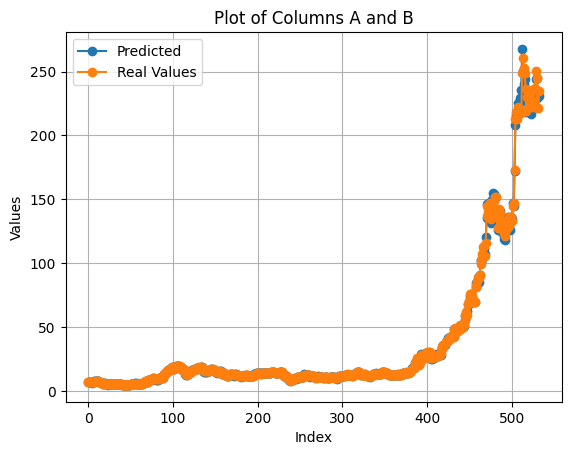

In [325]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Plot columns A and B against the index
df_sorted[['Open', 'Predicted']].plot(marker='o')

# Customize the plot (optional)
plt.title('Plot of Columns A and B')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(['Predicted', 'Real Values'])
plt.grid(True)
plt.show()

In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import glob
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

In [327]:
def getData(ticker, period='5y', interval='1d'):
    """
    :param stockName: The ticker symbol for the stock (e.g., 'AAPL' for Apple Inc.).
    :param period: The time frame for the data ('1d', '1mo', '1y', '5y', etc.). Default is '5y' for five years of data.
    :param interval: The data point frequency ('1m', '1d', '1wk', '1mo', etc.). Default is '1d' for daily data.
    :return: Returns the result dataframe for selected stock for given interval and period
    """
    return yf.download(tickers=ticker, period=period, interval=interval)

In [328]:
stock_list = ['THYAO', 'AKBNK', 'ARCLK', 'ASELS', 'BIMAS', 'DOHOL', 'EKGYO', 'EREGL'
   , 'FROTO', 'GUBRF', 'GARAN', 'KRDMD', 'KCHOL', 'KOZAL', 'KOZAA', 'PGSUS', 'PETKM', 'SAHOL'
   , 'SASA', 'SISE', 'TAVHL', 'TKFEN', 'TUPRS', 'TTKOM', 'TCELL', 'HALKB', 'ISCTR', 'VAKBN'
   , 'VESTL', 'YKBNK']
stc = [x + '.IS' for x in stock_list]
stc

['THYAO.IS',
 'AKBNK.IS',
 'ARCLK.IS',
 'ASELS.IS',
 'BIMAS.IS',
 'DOHOL.IS',
 'EKGYO.IS',
 'EREGL.IS',
 'FROTO.IS',
 'GUBRF.IS',
 'GARAN.IS',
 'KRDMD.IS',
 'KCHOL.IS',
 'KOZAL.IS',
 'KOZAA.IS',
 'PGSUS.IS',
 'PETKM.IS',
 'SAHOL.IS',
 'SASA.IS',
 'SISE.IS',
 'TAVHL.IS',
 'TKFEN.IS',
 'TUPRS.IS',
 'TTKOM.IS',
 'TCELL.IS',
 'HALKB.IS',
 'ISCTR.IS',
 'VAKBN.IS',
 'VESTL.IS',
 'YKBNK.IS']

In [329]:
data = getData('THYAO.IS', period='2y', interval='1h')

[*********************100%%**********************]  1 of 1 completed


In [330]:
data

Open        High         Low       Close  \
Datetime                                                                    
2022-01-17 09:30:00+03:00   28.440001   28.480000   28.120001   28.200001   
2022-01-17 10:30:00+03:00   28.180000   28.719999   28.139999   28.639999   
2022-01-17 11:30:00+03:00   28.639999   28.680000   28.320000   28.320000   
2022-01-17 12:30:00+03:00   28.320000   28.360001   28.160000   28.240000   
2022-01-17 13:30:00+03:00   28.219999   28.580000   28.200001   28.520000   
...                               ...         ...         ...         ...   
2024-01-15 13:30:00+03:00  250.750000  251.000000  249.800003  250.250000   
2024-01-15 14:30:00+03:00  250.250000  250.750000  249.100006  249.800003   
2024-01-15 15:30:00+03:00  249.800003  251.500000  249.699997  251.000000   
2024-01-15 16:30:00+03:00  251.000000  254.750000  250.750000  252.750000   
2024-01-15 17:30:00+03:00  252.750000  254.000000  252.500000  253.250000   

                            Adj Close    Volume  
Datetime                                         
2022-01-17 09:30:00+03:00   28.200001  10733697  
2022-01-17 10:30:00+03:00   28.639999  19398999  
2022-01-17 11:30:00+03:00   28.320000   8037006  
2022-01-17 12:30:00+03:00   28.240000   7773361  
2022-01-17 13:30:00+03:00   28.520000  12203708  
...                               ...       ...  
2024-01-15 13:30:00+03:00  250.250000   2083805  
2024-01-15 14:30:00+03:00  249.800003   2099692  
2024-01-15 15:30:00+03:00  251.000000   2690757  
2024-01-15 16:30:00+03:00  252.750000   7833036  
2024-01-15 17:30:00+03:00  253.250000   3029733  

[4208 rows x 6 columns]

In [331]:
data= data.reset_index()

In [332]:

from sklearn import preprocessing

In [333]:

drop_cols = ['High','Open','Low','Price', 'Vol.', 'Change %']
kf = kf.drop(drop_cols, axis=1)
kf

Datetime   Open_x
0     03/01/2005   1.2810
1     03/02/2005   1.2815
2     03/03/2005   1.2830
3     03/04/2005   1.2800
4     03/07/2005   1.2570
...          ...      ...
5390  01/10/2024  29.9669
5391  01/11/2024  29.8650
5392  01/12/2024  30.0672
5393  01/14/2024  30.0795
5394  01/15/2024  30.0865

[5395 rows x 2 columns]

In [334]:
kf["Datetime"]=pd.to_datetime(kf["Datetime"])
kf

Datetime   Open_x
0    2005-03-01   1.2810
1    2005-03-02   1.2815
2    2005-03-03   1.2830
3    2005-03-04   1.2800
4    2005-03-07   1.2570
...         ...      ...
5390 2024-01-10  29.9669
5391 2024-01-11  29.8650
5392 2024-01-12  30.0672
5393 2024-01-14  30.0795
5394 2024-01-15  30.0865

[5395 rows x 2 columns]

In [335]:

from sklearn import preprocessing

In [336]:
kf["Datetime"]=pd.to_datetime(kf["Datetime"])
kf

Datetime   Open_x
0    2005-03-01   1.2810
1    2005-03-02   1.2815
2    2005-03-03   1.2830
3    2005-03-04   1.2800
4    2005-03-07   1.2570
...         ...      ...
5390 2024-01-10  29.9669
5391 2024-01-11  29.8650
5392 2024-01-12  30.0672
5393 2024-01-14  30.0795
5394 2024-01-15  30.0865

[5395 rows x 2 columns]

In [337]:
desired_date = '2022-01-17'
result_row = kf[kf['Datetime'] == pd.to_datetime(desired_date)]

# Display the result
print("Row with date {}: \n{}".format(desired_date, result_row))

Row with date 2022-01-17: 
       Datetime   Open_x
4674 2022-01-17  13.5418
4675 2022-01-17  13.4231


In [338]:
df_no_duplicates = kf.drop_duplicates(subset=['Datetime'], keep='first')
df_no_duplicates.reset_index()

index   Datetime   Open_x
0         0 2005-03-01   1.2810
1         1 2005-03-02   1.2815
2         2 2005-03-03   1.2830
3         3 2005-03-04   1.2800
4         4 2005-03-07   1.2570
...     ...        ...      ...
4735   5390 2024-01-10  29.9669
4736   5391 2024-01-11  29.8650
4737   5392 2024-01-12  30.0672
4738   5393 2024-01-14  30.0795
4739   5394 2024-01-15  30.0865

[4740 rows x 3 columns]

In [339]:
desired_date = '2022-01-17'
result_row = df_no_duplicates[df_no_duplicates['Datetime'] == pd.to_datetime(desired_date)]

# Display the result
print("Row with date {}: \n{}".format(desired_date, result_row))

Row with date 2022-01-17: 
       Datetime   Open_x
4674 2022-01-17  13.5418


In [340]:
desired_date = '2022-01-17'
df_filtered = df_no_duplicates[df_no_duplicates['Datetime'] >= pd.to_datetime(desired_date)]
df_filtered

Datetime   Open_x
4674 2022-01-17  13.5418
4676 2022-01-18  13.4289
4678 2022-01-19  13.5681
4680 2022-01-20  13.3721
4682 2022-01-21  13.3700
...         ...      ...
5390 2024-01-10  29.9669
5391 2024-01-11  29.8650
5392 2024-01-12  30.0672
5393 2024-01-14  30.0795
5394 2024-01-15  30.0865

[502 rows x 2 columns]

In [341]:
desired_date = '2022-01-17'
df_filtered = df_no_duplicates[df_no_duplicates['Datetime'] >= pd.to_datetime(desired_date)]
df_filtered

Datetime   Open_x
4674 2022-01-17  13.5418
4676 2022-01-18  13.4289
4678 2022-01-19  13.5681
4680 2022-01-20  13.3721
4682 2022-01-21  13.3700
...         ...      ...
5390 2024-01-10  29.9669
5391 2024-01-11  29.8650
5392 2024-01-12  30.0672
5393 2024-01-14  30.0795
5394 2024-01-15  30.0865

[502 rows x 2 columns]

In [342]:
data

Datetime        Open        High         Low  \
0    2022-01-17 09:30:00+03:00   28.440001   28.480000   28.120001   
1    2022-01-17 10:30:00+03:00   28.180000   28.719999   28.139999   
2    2022-01-17 11:30:00+03:00   28.639999   28.680000   28.320000   
3    2022-01-17 12:30:00+03:00   28.320000   28.360001   28.160000   
4    2022-01-17 13:30:00+03:00   28.219999   28.580000   28.200001   
...                        ...         ...         ...         ...   
4203 2024-01-15 13:30:00+03:00  250.750000  251.000000  249.800003   
4204 2024-01-15 14:30:00+03:00  250.250000  250.750000  249.100006   
4205 2024-01-15 15:30:00+03:00  249.800003  251.500000  249.699997   
4206 2024-01-15 16:30:00+03:00  251.000000  254.750000  250.750000   
4207 2024-01-15 17:30:00+03:00  252.750000  254.000000  252.500000   

           Close   Adj Close    Volume  
0      28.200001   28.200001  10733697  
1      28.639999   28.639999  19398999  
2      28.320000   28.320000   8037006  
3      28.240000   28.240000   7773361  
4      28.520000   28.520000  12203708  
...          ...         ...       ...  
4203  250.250000  250.250000   2083805  
4204  249.800003  249.800003   2099692  
4205  251.000000  251.000000   2690757  
4206  252.750000  252.750000   7833036  
4207  253.250000  253.250000   3029733  

[4208 rows x 7 columns]

In [343]:
data["Datetime"]=pd.to_datetime(data["Datetime"])

In [344]:

from sklearn import preprocessing

In [345]:
a=data.Datetime
data=data.drop(columns='Datetime')
b=data.columns

In [346]:
data['Datetime']=a

In [347]:
data.Datetime=data.Datetime.astype(str)

In [348]:
ds=[]
for i in data.Datetime:
    ds.append(i[:-6])
data["Datetime"]=ds

In [349]:
data["Datetime"]=pd.to_datetime(data["Datetime"])
data

Open        High         Low       Close   Adj Close    Volume  \
0      28.440001   28.480000   28.120001   28.200001   28.200001  10733697   
1      28.180000   28.719999   28.139999   28.639999   28.639999  19398999   
2      28.639999   28.680000   28.320000   28.320000   28.320000   8037006   
3      28.320000   28.360001   28.160000   28.240000   28.240000   7773361   
4      28.219999   28.580000   28.200001   28.520000   28.520000  12203708   
...          ...         ...         ...         ...         ...       ...   
4203  250.750000  251.000000  249.800003  250.250000  250.250000   2083805   
4204  250.250000  250.750000  249.100006  249.800003  249.800003   2099692   
4205  249.800003  251.500000  249.699997  251.000000  251.000000   2690757   
4206  251.000000  254.750000  250.750000  252.750000  252.750000   7833036   
4207  252.750000  254.000000  252.500000  253.250000  253.250000   3029733   

                Datetime  
0    2022-01-17 09:30:00  
1    2022-01-17 10:30:00  
2    2022-01-17 11:30:00  
3    2022-01-17 12:30:00  
4    2022-01-17 13:30:00  
...                  ...  
4203 2024-01-15 13:30:00  
4204 2024-01-15 14:30:00  
4205 2024-01-15 15:30:00  
4206 2024-01-15 16:30:00  
4207 2024-01-15 17:30:00  

[4208 rows x 7 columns]

In [350]:
data

Open        High         Low       Close   Adj Close    Volume  \
0      28.440001   28.480000   28.120001   28.200001   28.200001  10733697   
1      28.180000   28.719999   28.139999   28.639999   28.639999  19398999   
2      28.639999   28.680000   28.320000   28.320000   28.320000   8037006   
3      28.320000   28.360001   28.160000   28.240000   28.240000   7773361   
4      28.219999   28.580000   28.200001   28.520000   28.520000  12203708   
...          ...         ...         ...         ...         ...       ...   
4203  250.750000  251.000000  249.800003  250.250000  250.250000   2083805   
4204  250.250000  250.750000  249.100006  249.800003  249.800003   2099692   
4205  249.800003  251.500000  249.699997  251.000000  251.000000   2690757   
4206  251.000000  254.750000  250.750000  252.750000  252.750000   7833036   
4207  252.750000  254.000000  252.500000  253.250000  253.250000   3029733   

                Datetime  
0    2022-01-17 09:30:00  
1    2022-01-17 10:30:00  
2    2022-01-17 11:30:00  
3    2022-01-17 12:30:00  
4    2022-01-17 13:30:00  
...                  ...  
4203 2024-01-15 13:30:00  
4204 2024-01-15 14:30:00  
4205 2024-01-15 15:30:00  
4206 2024-01-15 16:30:00  
4207 2024-01-15 17:30:00  

[4208 rows x 7 columns]

In [351]:
data['EMA_9'] = data['Open'].ewm(9).mean().shift()
data['SMA_5'] = data['Open'].rolling(5).mean().shift()
data['SMA_10'] = data['Open'].rolling(10).mean().shift()
data['SMA_15'] = data['Open'].rolling(15).mean().shift()
data['SMA_30'] = data['Open'].rolling(30).mean().shift()
df= data


In [352]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Datetime, y=df.EMA_9, name=' EMA 9'))
fig.add_trace(go.Scatter(x=df.Datetime, y=df.SMA_5, name= 'SMA 5'))
fig.add_trace(go.Scatter (x=df.Datetime, y=df.SMA_10, name=' SMA 10'))
fig.add_trace(go.Scatter (x=df.Datetime, y=df.SMA_15, name=' SMA 15'))
fig.add_trace(go. Scatter(x=df.Datetime, y=df.SMA_30, name=' SMA 30'))
fig.add_trace(go.Scatter(x=df.Datetime, y=df.Open, name='Open', opacity=0.2))

In [353]:
def relative_strength_idx(df, n=14):
    open = df['Open']
    delta = open.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(window=n).mean()
    rollDown = pricesDown.abs().rolling(window=n).mean()
    rs = rollUp/rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi
df['RSI'] = relative_strength_idx(df).fillna(0)
fig
fig.show()
go.Figure(go.Scatter(x=df.Datetime, y=df.RSI, name='RSI'))

In [354]:
EMA_12 = pd.Series(df['Open'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['Open'].ewm(span=26, min_periods=26).mean())
df['MACD'] = pd.Series(EMA_12 - EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())
EMA_12
df['MACD']
df['MACD_signal']


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4203    1.536606
4204    1.566851
4205    1.567367
4206    1.564795
4207    1.584776
Name: MACD_signal, Length: 4208, dtype: float64

In [355]:
#fig = make_subplots(rows=2,cols=1)
#fig.add_trace(go.Scatter(x=df.Datetime, y=df.Open, name='Open'), row=1, col=1)
#fig.add_trace(go.Scatter(x=df.Datetime, y=EMA_12, name='EMA 12'), row=1, col=1)
#fig.add_trace(go.Scatter(x=df.Datetime, y=EMA_26, name='EMA 26'), row=1, col=1)
#fig.add_trace(go.Scatter(x=df.Datetime, y=df['MACD'], name= 'MACD'), row=2, col=1)
#fig.add_trace(go.Scatter(x=df.Datetime, y=df['MACD_signal'], name='Signal line'),row=2, col=1)
#fig.show()


In [356]:
df['Open'] = df['Open'].shift(-1)
df

Open        High         Low       Close   Adj Close    Volume  \
0      28.180000   28.480000   28.120001   28.200001   28.200001  10733697   
1      28.639999   28.719999   28.139999   28.639999   28.639999  19398999   
2      28.320000   28.680000   28.320000   28.320000   28.320000   8037006   
3      28.219999   28.360001   28.160000   28.240000   28.240000   7773361   
4      28.520000   28.580000   28.200001   28.520000   28.520000  12203708   
...          ...         ...         ...         ...         ...       ...   
4203  250.250000  251.000000  249.800003  250.250000  250.250000   2083805   
4204  249.800003  250.750000  249.100006  249.800003  249.800003   2099692   
4205  251.000000  251.500000  249.699997  251.000000  251.000000   2690757   
4206  252.750000  254.750000  250.750000  252.750000  252.750000   7833036   
4207         NaN  254.000000  252.500000  253.250000  253.250000   3029733   

                Datetime       EMA_9       SMA_5      SMA_10      SMA_15  \
0    2022-01-17 09:30:00         NaN         NaN         NaN         NaN   
1    2022-01-17 10:30:00   28.440001         NaN         NaN         NaN   
2    2022-01-17 11:30:00   28.303158         NaN         NaN         NaN   
3    2022-01-17 12:30:00   28.427454         NaN         NaN         NaN   
4    2022-01-17 13:30:00   28.396208         NaN         NaN         NaN   
...                  ...         ...         ...         ...         ...   
4203 2024-01-15 13:30:00  248.474789  251.500000  248.859999  247.999999   
4204 2024-01-15 14:30:00  248.702310  251.100000  249.595000  248.249999   
4205 2024-01-15 15:30:00  248.857079  250.950000  250.280000  248.506666   
4206 2024-01-15 16:30:00  248.951372  250.610001  250.880000  248.646666   
4207 2024-01-15 17:30:00  249.156235  250.660001  250.955000  248.980000   

          SMA_30        RSI      MACD  MACD_signal  
0            NaN        NaN       NaN          NaN  
1            NaN   0.000000       NaN          NaN  
2            NaN   0.000000       NaN          NaN  
3            NaN   0.000000       NaN          NaN  
4            NaN   0.000000       NaN          NaN  
...          ...        ...       ...          ...  
4203  247.356667  61.182528  1.768589     1.536606  
4204  247.548333  56.836466  1.687833     1.566851  
4205  247.783333  60.919543  1.569431     1.567367  
4206  248.013334  69.822465  1.554507     1.564795  
4207  248.246667  76.338045  1.664701     1.584776  

[4208 rows x 15 columns]

In [357]:
df = df.iloc[33:]
df = df[:-1]
df.index =range(len(df))

In [358]:
df = df[:-1]
df


# Remove the last 6 characters from the 'Date' column
df['Datetime'] = df['Datetime'].astype(str)
df['Datetime'] = df['Datetime'].str[:-9]
df

Open        High         Low       Close   Adj Close    Volume  \
0      27.959999   28.100000   27.719999   27.959999   27.959999  13970897   
1      27.700001   28.040001   27.559999   27.700001   27.700001  10377037   
2      27.680000   27.719999   27.500000   27.680000   27.680000   7450102   
3      27.340000   27.740000   27.240000   27.340000   27.340000  12809257   
4      27.420000   27.540001   27.139999   27.440001   27.440001  11093229   
...          ...         ...         ...         ...         ...       ...   
4168  251.500000  252.500000  250.500000  251.500000  251.500000   4191148   
4169  250.750000  252.000000  250.500000  251.000000  251.000000   2369702   
4170  250.250000  251.000000  249.800003  250.250000  250.250000   2083805   
4171  249.800003  250.750000  249.100006  249.800003  249.800003   2099692   
4172  251.000000  251.500000  249.699997  251.000000  251.000000   2690757   

        Datetime       EMA_9    SMA_5      SMA_10      SMA_15      SMA_30  \
0     2022-01-21   27.764545   28.192   27.950000   27.542667   27.703333   
1     2022-01-21   27.764078   28.176   27.998000   27.594667   27.684667   
2     2022-01-21   27.784173   28.108   27.998000   27.672000   27.676000   
3     2022-01-21   27.775562   27.992   27.978000   27.733333   27.648667   
4     2022-01-21   27.765808   27.860   27.974000   27.813333   27.626000   
...          ...         ...      ...         ...         ...         ...   
4168  2024-01-15  247.848505  251.150  247.664999  247.576666  246.978333   
4169  2024-01-15  248.138655  251.250  248.139999  247.773333  247.163333   
4170  2024-01-15  248.474789  251.500  248.859999  247.999999  247.356667   
4171  2024-01-15  248.702310  251.100  249.595000  248.249999  247.548333   
4172  2024-01-15  248.857079  250.950  250.280000  248.506666  247.783333   

            RSI      MACD  MACD_signal  
0     64.285751  0.123871     0.074460  
1     66.666667  0.121814     0.085070  
2     67.428627  0.099251     0.088173  
3     65.882389  0.078946     0.086191  
4     50.980386  0.036364     0.075646  
...         ...       ...          ...  
4168  56.742979  1.726301     1.399506  
4169  61.658020  1.795028     1.478610  
4170  61.182528  1.768589     1.536606  
4171  56.836466  1.687833     1.566851  
4172  60.919543  1.569431     1.567367  

[4173 rows x 15 columns]

In [359]:
df

Open        High         Low       Close   Adj Close    Volume  \
0      27.959999   28.100000   27.719999   27.959999   27.959999  13970897   
1      27.700001   28.040001   27.559999   27.700001   27.700001  10377037   
2      27.680000   27.719999   27.500000   27.680000   27.680000   7450102   
3      27.340000   27.740000   27.240000   27.340000   27.340000  12809257   
4      27.420000   27.540001   27.139999   27.440001   27.440001  11093229   
...          ...         ...         ...         ...         ...       ...   
4168  251.500000  252.500000  250.500000  251.500000  251.500000   4191148   
4169  250.750000  252.000000  250.500000  251.000000  251.000000   2369702   
4170  250.250000  251.000000  249.800003  250.250000  250.250000   2083805   
4171  249.800003  250.750000  249.100006  249.800003  249.800003   2099692   
4172  251.000000  251.500000  249.699997  251.000000  251.000000   2690757   

        Datetime       EMA_9    SMA_5      SMA_10      SMA_15      SMA_30  \
0     2022-01-21   27.764545   28.192   27.950000   27.542667   27.703333   
1     2022-01-21   27.764078   28.176   27.998000   27.594667   27.684667   
2     2022-01-21   27.784173   28.108   27.998000   27.672000   27.676000   
3     2022-01-21   27.775562   27.992   27.978000   27.733333   27.648667   
4     2022-01-21   27.765808   27.860   27.974000   27.813333   27.626000   
...          ...         ...      ...         ...         ...         ...   
4168  2024-01-15  247.848505  251.150  247.664999  247.576666  246.978333   
4169  2024-01-15  248.138655  251.250  248.139999  247.773333  247.163333   
4170  2024-01-15  248.474789  251.500  248.859999  247.999999  247.356667   
4171  2024-01-15  248.702310  251.100  249.595000  248.249999  247.548333   
4172  2024-01-15  248.857079  250.950  250.280000  248.506666  247.783333   

            RSI      MACD  MACD_signal  
0     64.285751  0.123871     0.074460  
1     66.666667  0.121814     0.085070  
2     67.428627  0.099251     0.088173  
3     65.882389  0.078946     0.086191  
4     50.980386  0.036364     0.075646  
...         ...       ...          ...  
4168  56.742979  1.726301     1.399506  
4169  61.658020  1.795028     1.478610  
4170  61.182528  1.768589     1.536606  
4171  56.836466  1.687833     1.566851  
4172  60.919543  1.569431     1.567367  

[4173 rows x 15 columns]

In [360]:
kf['Datetime'] = kf['Datetime'].astype(str)
kf

Datetime   Open_x
0     2005-03-01   1.2810
1     2005-03-02   1.2815
2     2005-03-03   1.2830
3     2005-03-04   1.2800
4     2005-03-07   1.2570
...          ...      ...
5390  2024-01-10  29.9669
5391  2024-01-11  29.8650
5392  2024-01-12  30.0672
5393  2024-01-14  30.0795
5394  2024-01-15  30.0865

[5395 rows x 2 columns]

In [361]:
df

Open        High         Low       Close   Adj Close    Volume  \
0      27.959999   28.100000   27.719999   27.959999   27.959999  13970897   
1      27.700001   28.040001   27.559999   27.700001   27.700001  10377037   
2      27.680000   27.719999   27.500000   27.680000   27.680000   7450102   
3      27.340000   27.740000   27.240000   27.340000   27.340000  12809257   
4      27.420000   27.540001   27.139999   27.440001   27.440001  11093229   
...          ...         ...         ...         ...         ...       ...   
4168  251.500000  252.500000  250.500000  251.500000  251.500000   4191148   
4169  250.750000  252.000000  250.500000  251.000000  251.000000   2369702   
4170  250.250000  251.000000  249.800003  250.250000  250.250000   2083805   
4171  249.800003  250.750000  249.100006  249.800003  249.800003   2099692   
4172  251.000000  251.500000  249.699997  251.000000  251.000000   2690757   

        Datetime       EMA_9    SMA_5      SMA_10      SMA_15      SMA_30  \
0     2022-01-21   27.764545   28.192   27.950000   27.542667   27.703333   
1     2022-01-21   27.764078   28.176   27.998000   27.594667   27.684667   
2     2022-01-21   27.784173   28.108   27.998000   27.672000   27.676000   
3     2022-01-21   27.775562   27.992   27.978000   27.733333   27.648667   
4     2022-01-21   27.765808   27.860   27.974000   27.813333   27.626000   
...          ...         ...      ...         ...         ...         ...   
4168  2024-01-15  247.848505  251.150  247.664999  247.576666  246.978333   
4169  2024-01-15  248.138655  251.250  248.139999  247.773333  247.163333   
4170  2024-01-15  248.474789  251.500  248.859999  247.999999  247.356667   
4171  2024-01-15  248.702310  251.100  249.595000  248.249999  247.548333   
4172  2024-01-15  248.857079  250.950  250.280000  248.506666  247.783333   

            RSI      MACD  MACD_signal  
0     64.285751  0.123871     0.074460  
1     66.666667  0.121814     0.085070  
2     67.428627  0.099251     0.088173  
3     65.882389  0.078946     0.086191  
4     50.980386  0.036364     0.075646  
...         ...       ...          ...  
4168  56.742979  1.726301     1.399506  
4169  61.658020  1.795028     1.478610  
4170  61.182528  1.768589     1.536606  
4171  56.836466  1.687833     1.566851  
4172  60.919543  1.569431     1.567367  

[4173 rows x 15 columns]

In [362]:
import pandas as pd

# Example DataFrame 1




# Merge DataFrames on the 'Date' column
merged_df = pd.merge(df, kf, on='Datetime', how='left')

# Display the merged DataFrame
print("Merged DataFrame:")
merged_df


Merged DataFrame:


Open        High         Low       Close   Adj Close    Volume  \
0      27.959999   28.100000   27.719999   27.959999   27.959999  13970897   
1      27.700001   28.040001   27.559999   27.700001   27.700001  10377037   
2      27.680000   27.719999   27.500000   27.680000   27.680000   7450102   
3      27.340000   27.740000   27.240000   27.340000   27.340000  12809257   
4      27.420000   27.540001   27.139999   27.440001   27.440001  11093229   
...          ...         ...         ...         ...         ...       ...   
5944  251.500000  252.500000  250.500000  251.500000  251.500000   4191148   
5945  250.750000  252.000000  250.500000  251.000000  251.000000   2369702   
5946  250.250000  251.000000  249.800003  250.250000  250.250000   2083805   
5947  249.800003  250.750000  249.100006  249.800003  249.800003   2099692   
5948  251.000000  251.500000  249.699997  251.000000  251.000000   2690757   

        Datetime       EMA_9    SMA_5      SMA_10      SMA_15      SMA_30  \
0     2022-01-21   27.764545   28.192   27.950000   27.542667   27.703333   
1     2022-01-21   27.764078   28.176   27.998000   27.594667   27.684667   
2     2022-01-21   27.784173   28.108   27.998000   27.672000   27.676000   
3     2022-01-21   27.775562   27.992   27.978000   27.733333   27.648667   
4     2022-01-21   27.765808   27.860   27.974000   27.813333   27.626000   
...          ...         ...      ...         ...         ...         ...   
5944  2024-01-15  247.848505  251.150  247.664999  247.576666  246.978333   
5945  2024-01-15  248.138655  251.250  248.139999  247.773333  247.163333   
5946  2024-01-15  248.474789  251.500  248.859999  247.999999  247.356667   
5947  2024-01-15  248.702310  251.100  249.595000  248.249999  247.548333   
5948  2024-01-15  248.857079  250.950  250.280000  248.506666  247.783333   

            RSI      MACD  MACD_signal   Open_x  
0     64.285751  0.123871     0.074460  13.3700  
1     66.666667  0.121814     0.085070  13.3700  
2     67.428627  0.099251     0.088173  13.3700  
3     65.882389  0.078946     0.086191  13.3700  
4     50.980386  0.036364     0.075646  13.3700  
...         ...       ...          ...      ...  
5944  56.742979  1.726301     1.399506  30.0865  
5945  61.658020  1.795028     1.478610  30.0865  
5946  61.182528  1.768589     1.536606  30.0865  
5947  56.836466  1.687833     1.566851  30.0865  
5948  60.919543  1.569431     1.567367  30.0865  

[5949 rows x 16 columns]

In [363]:
drop_cols = ['Datetime','High','Low','Close', 'Open', 'Adj Close']
test = merged_df.drop(drop_cols, axis=1)
test.rename(columns={'Volume': 'Vol.'}, inplace=True)
test
last_column_name = test.columns[-1]

# Move the last column to the first position
df = pd.concat([test[last_column_name], test.drop(last_column_name, axis=1)], axis=1)
df_next =df
df

Open_x      Vol.       EMA_9    SMA_5      SMA_10      SMA_15  \
0     13.3700  13970897   27.764545   28.192   27.950000   27.542667   
1     13.3700  10377037   27.764078   28.176   27.998000   27.594667   
2     13.3700   7450102   27.784173   28.108   27.998000   27.672000   
3     13.3700  12809257   27.775562   27.992   27.978000   27.733333   
4     13.3700  11093229   27.765808   27.860   27.974000   27.813333   
...       ...       ...         ...      ...         ...         ...   
5944  30.0865   4191148  247.848505  251.150  247.664999  247.576666   
5945  30.0865   2369702  248.138655  251.250  248.139999  247.773333   
5946  30.0865   2083805  248.474789  251.500  248.859999  247.999999   
5947  30.0865   2099692  248.702310  251.100  249.595000  248.249999   
5948  30.0865   2690757  248.857079  250.950  250.280000  248.506666   

          SMA_30        RSI      MACD  MACD_signal  
0      27.703333  64.285751  0.123871     0.074460  
1      27.684667  66.666667  0.121814     0.085070  
2      27.676000  67.428627  0.099251     0.088173  
3      27.648667  65.882389  0.078946     0.086191  
4      27.626000  50.980386  0.036364     0.075646  
...          ...        ...       ...          ...  
5944  246.978333  56.742979  1.726301     1.399506  
5945  247.163333  61.658020  1.795028     1.478610  
5946  247.356667  61.182528  1.768589     1.536606  
5947  247.548333  56.836466  1.687833     1.566851  
5948  247.783333  60.919543  1.569431     1.567367  

[5949 rows x 10 columns]

In [364]:
train, test = train_test_split(merged_df, test_size=0.2, random_state=0)
train_X = train.drop('Open', axis= 1)
train_y = train[['Open']]

test_X = test.drop('Open', axis= 1)
test_y = test[['Open']]

In [365]:
train_X

High         Low       Close   Adj Close    Volume    Datetime  \
5591  230.600006  229.000000  229.199997  229.199997   2944956  2023-11-13   
1705   49.099998   48.560001   48.860001   48.860001         0  2022-07-18   
2549   69.650002   68.449997   69.000000   69.000000         0  2022-09-29   
295    29.280001   28.700001   28.840000   28.840000  19110026  2022-02-18   
4170  125.199997  123.900002  124.699997  124.699997   2326166  2023-03-22   
...          ...         ...         ...         ...       ...         ...   
4931  232.899994  231.899994  232.500000  232.500000   3016645  2023-07-28   
3264  130.699997  129.000000  130.100006  130.100006   5337455  2022-12-05   
1653   48.380001   48.139999   48.320000   48.320000   5593965  2022-07-07   
2607   80.750000   79.500000   79.900002   79.900002   7959580  2022-10-04   
2732   89.699997   89.349998   89.699997   89.699997   3586343  2022-10-14   

           EMA_9       SMA_5      SMA_10      SMA_15      SMA_30        RSI  \
5591  228.835064  230.260001  229.630002  228.380001  228.260000  65.040634   
1705   48.883610   48.504001   48.690001   49.078000   49.099667  36.503850   
2549   70.296042   69.849998   70.229999   70.646666   70.333333  27.710737   
295    29.478128   29.243999   29.427999   29.548000   29.578666  39.639596   
4170  125.578057  124.380000  123.930000  124.666667  127.426668  35.135174   
...          ...         ...         ...         ...         ...        ...   
4931  226.390046  230.919995  228.009996  226.659998  223.093332  77.443551   
3264  126.098804  129.080000  127.770000  126.720000  123.936667  63.749981   
1653   47.858201   47.888000   47.808000   47.553333   48.207334  63.913065   
2607   75.752086   79.360001   77.925000   76.423334   72.583334  88.775460   
2732   87.340530   88.959999   88.079999   87.126666   86.313333  74.074137   

          MACD  MACD_signal   Open_x  
5591  0.999870     0.861248  28.5559  
1705 -0.074728     0.043509  17.3786  
2549 -0.264414    -0.125208  18.5089  
295  -0.067713     0.005471  13.5853  
4170 -1.594538    -1.932742  19.0294  
...        ...          ...      ...  
4931  2.746898     1.846063  26.9604  
3264  2.502208     2.537223  18.6346  
1653 -0.010309    -0.138120  17.2057  
2607  2.633480     2.189260  18.5360  
2732  1.187731     0.852360  18.5676  

[4759 rows x 15 columns]

In [366]:
y_train =train_y

In [367]:
y_test = test_y

In [368]:
X_test = test_X

In [369]:

X_train = train_X


In [370]:
X_train
drop_cols = ['Datetime','High','Low','Close', 'Adj Close']
X_train = X_train.drop(drop_cols, axis=1)
X_train


Volume       EMA_9       SMA_5      SMA_10      SMA_15      SMA_30  \
5591   2944956  228.835064  230.260001  229.630002  228.380001  228.260000   
1705         0   48.883610   48.504001   48.690001   49.078000   49.099667   
2549         0   70.296042   69.849998   70.229999   70.646666   70.333333   
295   19110026   29.478128   29.243999   29.427999   29.548000   29.578666   
4170   2326166  125.578057  124.380000  123.930000  124.666667  127.426668   
...        ...         ...         ...         ...         ...         ...   
4931   3016645  226.390046  230.919995  228.009996  226.659998  223.093332   
3264   5337455  126.098804  129.080000  127.770000  126.720000  123.936667   
1653   5593965   47.858201   47.888000   47.808000   47.553333   48.207334   
2607   7959580   75.752086   79.360001   77.925000   76.423334   72.583334   
2732   3586343   87.340530   88.959999   88.079999   87.126666   86.313333   

            RSI      MACD  MACD_signal   Open_x  
5591  65.040634  0.999870     0.861248  28.5559  
1705  36.503850 -0.074728     0.043509  17.3786  
2549  27.710737 -0.264414    -0.125208  18.5089  
295   39.639596 -0.067713     0.005471  13.5853  
4170  35.135174 -1.594538    -1.932742  19.0294  
...         ...       ...          ...      ...  
4931  77.443551  2.746898     1.846063  26.9604  
3264  63.749981  2.502208     2.537223  18.6346  
1653  63.913065 -0.010309    -0.138120  17.2057  
2607  88.775460  2.633480     2.189260  18.5360  
2732  74.074137  1.187731     0.852360  18.5676  

[4759 rows x 10 columns]

In [371]:
X_train

Volume       EMA_9       SMA_5      SMA_10      SMA_15      SMA_30  \
5591   2944956  228.835064  230.260001  229.630002  228.380001  228.260000   
1705         0   48.883610   48.504001   48.690001   49.078000   49.099667   
2549         0   70.296042   69.849998   70.229999   70.646666   70.333333   
295   19110026   29.478128   29.243999   29.427999   29.548000   29.578666   
4170   2326166  125.578057  124.380000  123.930000  124.666667  127.426668   
...        ...         ...         ...         ...         ...         ...   
4931   3016645  226.390046  230.919995  228.009996  226.659998  223.093332   
3264   5337455  126.098804  129.080000  127.770000  126.720000  123.936667   
1653   5593965   47.858201   47.888000   47.808000   47.553333   48.207334   
2607   7959580   75.752086   79.360001   77.925000   76.423334   72.583334   
2732   3586343   87.340530   88.959999   88.079999   87.126666   86.313333   

            RSI      MACD  MACD_signal   Open_x  
5591  65.040634  0.999870     0.861248  28.5559  
1705  36.503850 -0.074728     0.043509  17.3786  
2549  27.710737 -0.264414    -0.125208  18.5089  
295   39.639596 -0.067713     0.005471  13.5853  
4170  35.135174 -1.594538    -1.932742  19.0294  
...         ...       ...          ...      ...  
4931  77.443551  2.746898     1.846063  26.9604  
3264  63.749981  2.502208     2.537223  18.6346  
1653  63.913065 -0.010309    -0.138120  17.2057  
2607  88.775460  2.633480     2.189260  18.5360  
2732  74.074137  1.187731     0.852360  18.5676  

[4759 rows x 10 columns]

In [372]:
y_train

Open
5591  229.199997
1705   48.860001
2549   69.050003
295    28.840000
4170  124.699997
...          ...
4931  232.600006
3264  130.100006
1653   48.320000
2607   79.849998
2732   89.699997

[4759 rows x 1 columns]

In [373]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.9996669477370391
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [374]:


reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=500,
                       objective='reg:squarederror',
                       max_depth=7,
                       learning_rate=0.07)
reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [375]:
X_test

High         Low       Close   Adj Close    Volume    Datetime  \
134    28.360001   27.920000   28.260000   28.260000  20818339  2022-02-03   
1364   47.240002   46.840000   46.959999   46.959999  14990371  2022-06-09   
555    28.000000   27.840000   27.879999   27.879999   7920044  2022-03-16   
4447  132.500000  130.500000  132.000000  132.000000   3854849  2023-05-09   
2858  101.599998  100.500000  101.000000  101.000000   8654981  2022-10-26   
...          ...         ...         ...         ...       ...         ...   
666    29.240000   29.080000   29.200001   29.200001   9082395  2022-03-28   
1547   49.860001   49.259998   49.360001   49.360001  17140230  2022-06-28   
2857  101.599998  100.500000  101.000000  101.000000   8654981  2022-10-26   
3955  139.899994  139.899994  139.899994  139.899994    169144  2023-02-15   
3364  144.600006  143.100006  143.699997  143.699997   7065496  2022-12-14   

           EMA_9       SMA_5      SMA_10      SMA_15      SMA_30        RSI  \
134    28.297104   28.012000   28.198000   28.348000   28.497333  33.333333   
1364   48.532193   48.331999   48.857999   48.593333   48.481333  42.896929   
555    27.153474   27.848000   27.324000   27.093334   26.772667  78.431356   
4447  128.252981  130.320000  128.300000  127.400000  127.769999  79.591843   
2858  100.325198  101.120001  101.140000  100.516667   99.573333  72.549090   
...          ...         ...         ...         ...         ...        ...   
666    28.437620   28.660000   28.456000   28.356000   28.399333  84.000015   
1547   50.222325   49.804000   49.872000   49.898667   50.909333  43.478237   
2857  100.325198  101.120001  101.140000  100.516667   99.573333  72.549090   
3955  135.378536  139.899994  134.759996  132.919997  134.883332  64.720187   
3364  143.270368  144.519998  144.689999  144.126666  141.473334  55.555540   

          MACD  MACD_signal   Open_x  
134  -0.121720    -0.021956  13.5549  
1364 -0.221303    -0.041152  17.2272  
555   0.405028     0.313191  14.6921  
4447  0.911686     0.213036  19.5065  
2858  0.768850     0.762241  18.6037  
...        ...          ...      ...  
666   0.168918     0.080641  14.8184  
1547 -0.322316    -0.302249  16.5566  
2857  0.768850     0.762241  18.6161  
3955  1.315927     0.030878  18.8499  
3364  1.555625     1.916219  18.5954  

[1190 rows x 15 columns]

In [376]:
drop_cols = ['Datetime','High','Low','Close', 'Adj Close']
X_test = X_test.drop(drop_cols, axis=1)
X_test

Volume       EMA_9       SMA_5      SMA_10      SMA_15      SMA_30  \
134   20818339   28.297104   28.012000   28.198000   28.348000   28.497333   
1364  14990371   48.532193   48.331999   48.857999   48.593333   48.481333   
555    7920044   27.153474   27.848000   27.324000   27.093334   26.772667   
4447   3854849  128.252981  130.320000  128.300000  127.400000  127.769999   
2858   8654981  100.325198  101.120001  101.140000  100.516667   99.573333   
...        ...         ...         ...         ...         ...         ...   
666    9082395   28.437620   28.660000   28.456000   28.356000   28.399333   
1547  17140230   50.222325   49.804000   49.872000   49.898667   50.909333   
2857   8654981  100.325198  101.120001  101.140000  100.516667   99.573333   
3955    169144  135.378536  139.899994  134.759996  132.919997  134.883332   
3364   7065496  143.270368  144.519998  144.689999  144.126666  141.473334   

            RSI      MACD  MACD_signal   Open_x  
134   33.333333 -0.121720    -0.021956  13.5549  
1364  42.896929 -0.221303    -0.041152  17.2272  
555   78.431356  0.405028     0.313191  14.6921  
4447  79.591843  0.911686     0.213036  19.5065  
2858  72.549090  0.768850     0.762241  18.6037  
...         ...       ...          ...      ...  
666   84.000015  0.168918     0.080641  14.8184  
1547  43.478237 -0.322316    -0.302249  16.5566  
2857  72.549090  0.768850     0.762241  18.6161  
3955  64.720187  1.315927     0.030878  18.8499  
3364  55.555540  1.555625     1.916219  18.5954  

[1190 rows x 10 columns]

In [377]:
y_pred = reg.predict(X_test)

In [378]:
y_pred

array([ 28.145554,  47.972878,  27.958683, ..., 101.046776, 150.75027 ,
       143.63759 ], dtype=float32)

This was the approach to firstly forecast the feature set then forecast the necessary valeus. However as it can seen in the last 3 data it overfits. the below 2 code point shows its result. I did not include the forecast code since it overfits

In [379]:
print(y_pred)

[ 28.145554  47.972878  27.958683 ... 101.046776 150.75027  143.63759 ]


In [380]:
print(f'y_true = {np.array(y_test)[5:]}')
print(f'y_pred = {y_pred[5:]}')

y_true = [[133.3999939 ]
 [124.69999695]
 [236.5       ]
 ...
 [101.        ]
 [151.1000061 ]
 [143.80000305]]
y_pred = [133.44093  126.23713  234.79909  ... 101.046776 150.75027  143.63759 ]


In [381]:
df2 = pd.DataFrame(y_pred).reset_index()

In [382]:
df1 = y_test.reset_index()

In [383]:
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)
merged_df

index_x        Open  index_y           0
0         134   28.260000        0   28.145554
1        1364   46.980000        1   47.972878
2         555   27.860001        2   27.958683
3        4447  132.100006        3  133.780136
4        2858  101.000000        4  100.954765
...       ...         ...      ...         ...
1185      666   29.200001     1185   28.968714
1186     1547   49.360001     1186   49.592655
1187     2857  101.000000     1187  101.046776
1188     3955  151.100006     1188  150.750275
1189     3364  143.800003     1189  143.637589

[1190 rows x 4 columns]

In [384]:

merged_df.drop('index_y', axis='columns', inplace=True)
merged_df

index_x        Open           0
0         134   28.260000   28.145554
1        1364   46.980000   47.972878
2         555   27.860001   27.958683
3        4447  132.100006  133.780136
4        2858  101.000000  100.954765
...       ...         ...         ...
1185      666   29.200001   28.968714
1186     1547   49.360001   49.592655
1187     2857  101.000000  101.046776
1188     3955  151.100006  150.750275
1189     3364  143.800003  143.637589

[1190 rows x 3 columns]

In [385]:
merged_df.tail(30)

index_x        Open           0
1160     4196  126.900002  126.109810
1161     4908  217.600006  218.097458
1162     3225  119.699997  119.926521
1163     3529  141.399994  141.476196
1164     1336   48.299999   48.254684
1165      896   37.860001   37.864334
1166     2234   71.650002   71.709671
1167     3535  143.699997  142.415894
1168     1597   48.740002   48.702381
1169     3891  126.800003  134.041290
1170     2664   85.949997   85.625908
1171     5597  233.000000  234.533234
1172     1189   42.980000   42.715153
1173     3758  154.399994  154.330566
1174     2696   84.449997   84.618073
1175     5502  211.100006  209.497940
1176     1314   48.560001   48.401505
1177     5525  220.300003  220.310608
1178     3171  112.500000  113.219940
1179      567   27.820000   27.874685
1180     2807   99.900002   99.092453
1181     1513   51.599998   51.743855
1182     4894  225.100006  225.985352
1183     5588  230.600006  231.548065
1184     4477  134.199997  133.828140
1185      666   29.200001   28.968714
1186     1547   49.360001   49.592655
1187     2857  101.000000  101.046776
1188     3955  151.100006  150.750275
1189     3364  143.800003  143.637589

In [386]:
column_names = merged_df.columns.tolist()

# Change the name of the third column
new_column_name = 'Predicted'
column_names[2] = new_column_name

# Update the dataframe with the new column names
merged_df.columns = column_names

merged_df

index_x        Open   Predicted
0         134   28.260000   28.145554
1        1364   46.980000   47.972878
2         555   27.860001   27.958683
3        4447  132.100006  133.780136
4        2858  101.000000  100.954765
...       ...         ...         ...
1185      666   29.200001   28.968714
1186     1547   49.360001   49.592655
1187     2857  101.000000  101.046776
1188     3955  151.100006  150.750275
1189     3364  143.800003  143.637589

[1190 rows x 3 columns]

In [387]:
df_sorted = merged_df.sort_values(by='index_x')
df_sorted = df_sorted.reset_index()
df_sorted

index  index_x        Open   Predicted
0       419        1   27.700001   27.887987
1      1039        4   27.420000   27.796669
2       997       12   27.959999   27.644829
3       183       14   27.520000   27.438896
4       121       15   26.780001   27.186792
...     ...      ...         ...         ...
1185   1146     5917  242.899994  244.445908
1186    774     5927  246.800003  250.133759
1187    844     5928  247.800003  248.307129
1188     67     5938  250.250000  246.855576
1189    815     5943  250.750000  249.499329

[1190 rows x 4 columns]

In [388]:
df_last_20 = df_sorted.tail(20)

# Extract features (X) and target variable (Y)
X = df_last_20[['index_x']]
y = df_last_20['Predicted']
X


index_x
1170     5838
1171     5843
1172     5847
1173     5848
1174     5863
1175     5870
1176     5873
1177     5877
1178     5880
1179     5881
1180     5887
1181     5891
1182     5894
1183     5898
1184     5901
1185     5917
1186     5927
1187     5928
1188     5938
1189     5943

In [389]:
y.tolist()

[227.92730712890625,
 227.7998504638672,
 227.0921630859375,
 226.85733032226562,
 229.49920654296875,
 233.6902618408203,
 234.0167694091797,
 237.31309509277344,
 234.494140625,
 234.93856811523438,
 231.51516723632812,
 231.4132537841797,
 232.79092407226562,
 236.42828369140625,
 240.9676513671875,
 244.44590759277344,
 250.13375854492188,
 248.30712890625,
 246.85557556152344,
 249.49932861328125]

These are the last predicted values then i used simple moving -- double moving avarage

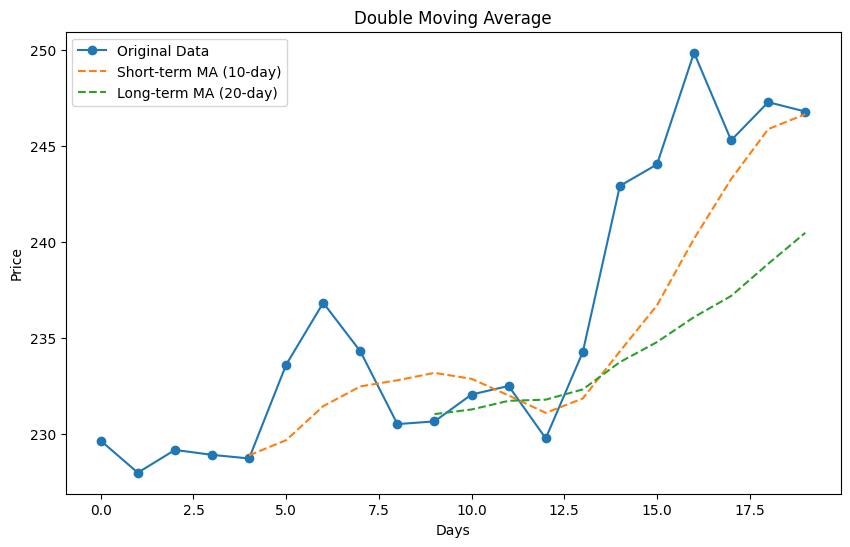

In [390]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = [229.6607208251953, 227.99008178710938, 229.1783905029297, 228.92149353027344,
        228.73313903808594, 233.61880493164062, 236.84359741210938, 234.3177490234375,
        230.52389526367188, 230.66407775878906, 232.06591796875, 232.5103302001953,
        229.77906799316406, 234.27850341796875, 242.93809509277344, 244.05545043945312,
        249.8767852783203, 245.313720703125, 247.30084228515625, 246.81112670898438]

# Create a DataFrame
df = pd.DataFrame({'Price': data})

# Calculate short-term moving average (10-day)
df['Short_MA'] = df['Price'].rolling(window=5).mean()

# Calculate long-term moving average (20-day)
df['Long_MA'] = df['Price'].rolling(window=10).mean()

# Plot the original data and moving averages
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], label='Original Data', marker='o')
plt.plot(df['Short_MA'], label='Short-term MA (10-day)', linestyle='--')
plt.plot(df['Long_MA'], label='Long-term MA (20-day)', linestyle='--')

plt.title('Double Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

Original Data and Initial SMA:
         Price         SMA
0   229.660721         NaN
1   227.990082         NaN
2   229.178391         NaN
3   228.921494         NaN
4   228.733139  228.896765
5   233.618805  229.688382
6   236.843597  231.459085
7   234.317749  232.486957
8   230.523895  232.807437
9   230.664078  233.193625
10  232.065918  232.883047
11  232.510330  232.016394
12  229.779068  231.108658
13  234.278503  231.859579
14  242.938095  234.314383
15  244.055450  236.712289
16  249.876785  240.185580
17  245.313721  243.292511
18  247.300842  245.896979
19  246.811127  246.671585

Final DataFrame with New Data Points and SMAs:
         Price         SMA
0   229.660721         NaN
1   227.990082         NaN
2   229.178391         NaN
3   228.921494         NaN
4   228.733139  228.896765
5   233.618805  229.688382
6   236.843597  231.459085
7   234.317749  232.486957
8   230.523895  232.807437
9   230.664078  233.193625
10  232.065918  232.883047
11  232.510330  232.016394
12 

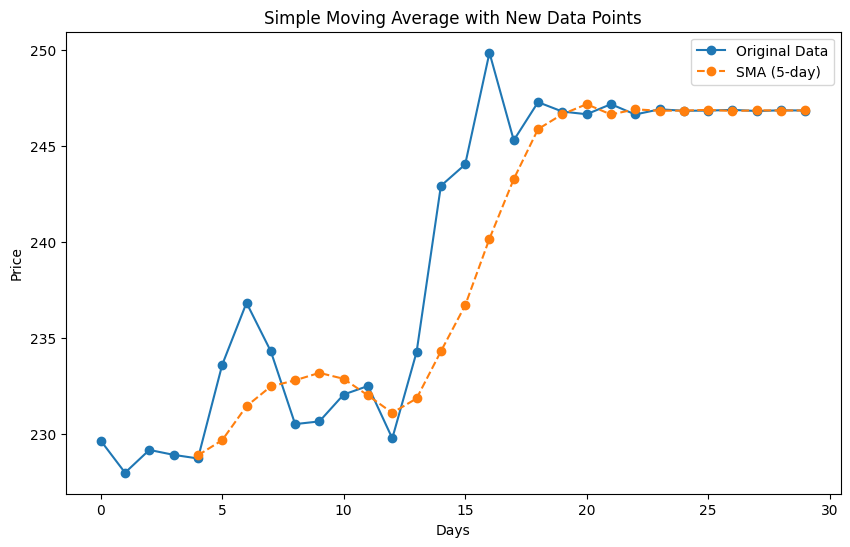

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Given data
data = [229.6607208251953, 227.99008178710938, 229.1783905029297, 228.92149353027344,
        228.73313903808594, 233.61880493164062, 236.84359741210938, 234.3177490234375,
        230.52389526367188, 230.66407775878906, 232.06591796875, 232.5103302001953,
        229.77906799316406, 234.27850341796875, 242.93809509277344, 244.05545043945312,
        249.8767852783203, 245.313720703125, 247.30084228515625, 246.81112670898438]

# Create a DataFrame
df = pd.DataFrame({'Price': data})

# Calculate simple moving average (SMA) with a window of 5
window_size = 5
df['SMA'] = df['Price'].rolling(window=window_size).mean()

# Display the original data and the initial SMA
print("Original Data and Initial SMA:")
print(df)

# Perform iterative SMA for the next 10 times
for _ in range(10):
    # Calculate SMA for the last window_size data points
    new_data_point = df['Price'].iloc[-window_size:].mean()

    # Append the new data point to the list
    data.append(new_data_point)

    # Update the DataFrame with the new data point
    df = pd.DataFrame({'Price': data})
    df['SMA'] = df['Price'].rolling(window=window_size).mean()
    df2=df
# Display the final DataFrame with the new data points and SMAs
print("\nFinal DataFrame with New Data Points and SMAs:")
print(df2)

# Plot the original data and the final SMAs
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], label='Original Data', marker='o')
plt.plot(df['SMA'], label=f'SMA ({window_size}-day)', linestyle='--', marker='o')
plt.title('Simple Moving Average with New Data Points')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()



Original Data and Initial SMA:
         Price         SMA
0   229.660721         NaN
1   227.990082         NaN
2   229.178391         NaN
3   228.921494         NaN
4   228.733139         NaN
5   233.618805         NaN
6   236.843597         NaN
7   234.317749         NaN
8   230.523895         NaN
9   230.664078  231.045195
10  232.065918  231.285715
11  232.510330  231.737740
12  229.779068  231.797807
13  234.278503  232.333508
14  242.938095  233.754004
15  244.055450  234.797668
16  249.876785  236.100987
17  245.313721  237.200584
18  247.300842  238.878279
19  246.811127  240.492984

Final DataFrame with New Data Points and SMAs:
         Price         SMA
0   229.660721         NaN
1   227.990082         NaN
2   229.178391         NaN
3   228.921494         NaN
4   228.733139         NaN
5   233.618805         NaN
6   236.843597         NaN
7   234.317749         NaN
8   230.523895         NaN
9   230.664078  231.045195
10  232.065918  231.285715
11  232.510330  231.737740
12 

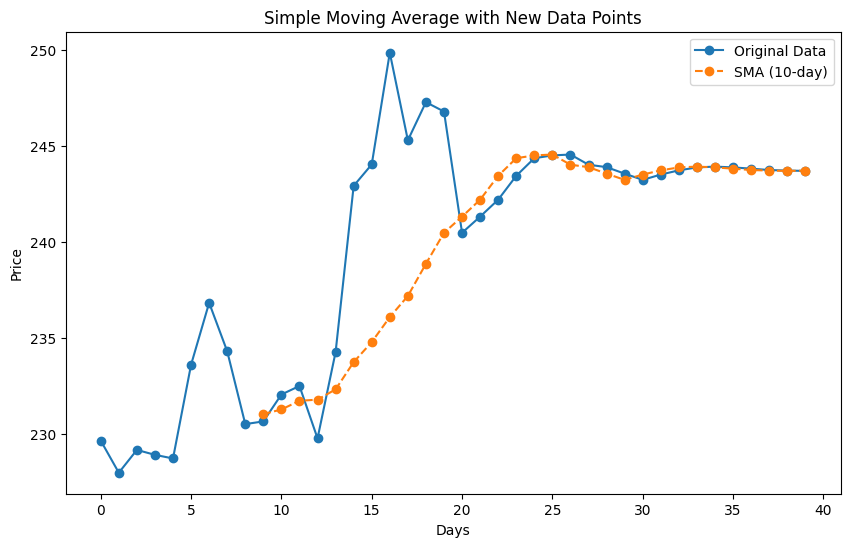

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Given data
data = [229.6607208251953, 227.99008178710938, 229.1783905029297, 228.92149353027344,
        228.73313903808594, 233.61880493164062, 236.84359741210938, 234.3177490234375,
        230.52389526367188, 230.66407775878906, 232.06591796875, 232.5103302001953,
        229.77906799316406, 234.27850341796875, 242.93809509277344, 244.05545043945312,
        249.8767852783203, 245.313720703125, 247.30084228515625, 246.81112670898438]

# Create a DataFrame
df = pd.DataFrame({'Price': data})

# Calculate simple moving average (SMA) with a window of 5
window_size = 10
df['SMA'] = df['Price'].rolling(window=window_size).mean()

# Display the original data and the initial SMA
print("Original Data and Initial SMA:")
print(df)

# Perform iterative SMA for the next 10 times
for _ in range(20):
    # Calculate SMA for the last window_size data points
    new_data_point = df['Price'].iloc[-window_size:].mean()

    # Append the new data point to the list
    data.append(new_data_point)

    # Update the DataFrame with the new data point
    df = pd.DataFrame({'Price': data})
    df['SMA'] = df['Price'].rolling(window=window_size).mean()

# Display the final DataFrame with the new data points and SMAs
print("\nFinal DataFrame with New Data Points and SMAs:")
print(df)

# Plot the original data and the final SMAs
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], label='Original Data', marker='o')
plt.plot(df['SMA'], label=f'SMA ({window_size}-day)', linestyle='--', marker='o')
plt.title('Simple Moving Average with New Data Points')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()



In [393]:
df

Price         SMA
0   229.660721         NaN
1   227.990082         NaN
2   229.178391         NaN
3   228.921494         NaN
4   228.733139         NaN
5   233.618805         NaN
6   236.843597         NaN
7   234.317749         NaN
8   230.523895         NaN
9   230.664078  231.045195
10  232.065918  231.285715
11  232.510330  231.737740
12  229.779068  231.797807
13  234.278503  232.333508
14  242.938095  233.754004
15  244.055450  234.797668
16  249.876785  236.100987
17  245.313721  237.200584
18  247.300842  238.878279
19  246.811127  240.492984
20  240.492984  241.335691
21  241.335691  242.218227
22  242.218227  243.462143
23  243.462143  244.380506
24  244.380506  244.524748
25  244.524748  244.571677
26  244.571677  244.041166
27  244.041166  243.913911
28  243.913911  243.575218
29  243.575218  243.251627
30  243.251627  243.527491
31  243.527491  243.746671
32  243.746671  243.899516
33  243.899516  243.943253
34  243.943253  243.899528
35  243.899528  243.837006
36  243.837006  243.763539
37  243.763539  243.735776
38  243.735776  243.717963
39  243.717963  243.732237

I adjusted the trend that found using simple moving average to the last data have observed with sma5

In [394]:
final_adjustment = df2['Price'][20] - df['Price'][20]

In [395]:
df['Price'][-10:] += final_adjustment

In [396]:
df['Price'][-10:]

30    249.430228
31    249.706092
32    249.925273
33    250.078117
34    250.121854
35    250.078129
36    250.015607
37    249.942140
38    249.914377
39    249.896564
Name: Price, dtype: float64

In [397]:
df['Price'][-10:].to_numpy()

array([249.43022813, 249.70609243, 249.92527251, 250.07811698,
       250.12185432, 250.078129  , 250.01560704, 249.94213991,
       249.91437715, 249.89656365])

I have been also tried prophet package to find the trend in some submission

I have also tried to predict the next values for my feature set then predict with algorithms but the results were not good as this way.

In [398]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [399]:
rf_regressor = RandomForestRegressor(random_state=1, oob_score=True)

In [400]:
# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50],  # Number of trees in the forest
    'max_features': [2, 4, 6],  # Number of features to consider at each split
    'criterion': ['squared_error'],  # Splitting criterion
    'min_samples_split': [5]  # Minimum number of samples required to split an internal node
    
    
}

In [401]:
grid_search = GridSearchCV(estimator=rf_regressor,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=10) 

In [ ]:
regressor = grid_search.fit(X_train,y_train)

In [403]:
from sklearn.metrics import mean_squared_error, r2_score
 
# Access the OOB Score

 
# Making predictions on the same data or new data
predictions = regressor.predict(X_test)
 
# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
 
y_pred

Mean Squared Error: 1.9460819657472341


array([ 28.145554,  47.972878,  27.958683, ..., 101.046776, 150.75027 ,
       143.63759 ], dtype=float32)

Not good as boosting